# Imports

In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import mne
import os
import pandas as pd
import seaborn as sns

from mne_connectivity import spectral_connectivity_epochs 
from mne.viz import plot_sensors

# Load Data

In [2]:
# File paths
preprosed_data_path = 'out_data'
# epoched_data_path = 'epoched_data'

prepros_path_1 = 'SUB103_ses-1_task-dur_run-01_epochs-epo.fif' # For the final report: run on all subjects and runs
# prepros_path_2 = 'SUB103_ses-1_task-dur_run-01_epochs-epo-1.fif'
# prepros_path_3 = 'SUB103_ses-1_task-dur_run-01_epochs-epo-2.fif'

# combined_epochs_path = 'SUB103_ses-1_task-dur_run-01_epochs-epo.fif'

In [3]:
# # Load the epochs files
# epochs_1 = mne.read_epochs(pathlib.Path(preprosed_data_path) / prepros_path_1)
# epochs_2 = mne.read_epochs(pathlib.Path(preprosed_data_path) / prepros_path_2)
# epochs_3 = mne.read_epochs(pathlib.Path(preprosed_data_path) / prepros_path_3)

# # Concatenate the epochs
# epochs_combined = mne.concatenate_epochs([epochs_1, epochs_2, epochs_3])

# # Save the concatenated epochs
# epochs_combined.save(pathlib.Path(epoched_data_path) / combined_epochs_path, overwrite=True)

# # Delete the old files
# os.remove(pathlib.Path(preprosed_data_path) / prepros_path_1)
# os.remove(pathlib.Path(preprosed_data_path) / prepros_path_2)
# os.remove(pathlib.Path(preprosed_data_path) / prepros_path_3)

In [4]:
# Read epoched data
epochs = mne.read_epochs(pathlib.Path(preprosed_data_path) / prepros_path_1)

Reading /workspace/cogitate/out_data/SUB103_ses-1_task-dur_run-01_epochs-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...    1750.00 ms
        0 CTF compensation matrices available
Reading /workspace/cogitate/out_data/SUB103_ses-1_task-dur_run-01_epochs-epo-1.fif ...
    Found the data of interest:
        t =    -250.00 ...    1750.00 ms
        0 CTF compensation matrices available
Reading /workspace/cogitate/out_data/SUB103_ses-1_task-dur_run-01_epochs-epo-2.fif ...
    Found the data of interest:
        t =    -250.00 ...    1750.00 ms
        0 CTF compensation matrices available
Not setting metadata
2081 matching events found
No baseline correction applied
0 projection items activated


# Extract Task-related Events

In [5]:
# Print original events information
epochs

Number of events,2081
Events,1000ms: 951500ms: 97500ms: 97blank offset: 297center: 161face01: 3face02: 4face03: 3face04: 4face06: 4face07: 6face08: 3face09: 2face10: 4face11: 5face12: 7face13: 1face14: 5face15: 4face16: 5face17: 5face18: 3face19: 3face20: 1false01: 6false02: 6false04: 4false05: 2false06: 5false07: 8false08: 4false09: 3false10: 2false11: 5false12: 4false13: 2false14: 4false15: 6false16: 1false17: 4false18: 5false19: 1false20: 4left: 69letter01: 4letter02: 1letter03: 3letter04: 2letter05: 5letter06: 6letter07: 3letter08: 3letter09: 5letter10: 8letter11: 3letter12: 7letter13: 3letter14: 5letter15: 1letter16: 5letter17: 3letter20: 4object01: 3object02: 3object03: 4object04: 4object05: 3object06: 2object07: 3object08: 4object09: 6object10: 2object11: 6object12: 2object13: 2object14: 5object15: 4object16: 2object17: 7object18: 4object19: 1object20: 3response: 34right: 59sequence01: 1sequence02: 1sequence03: 1sequence04: 1sequence05: 1sequence06: 1sequence07: 1sequence08: 1start experiment: 1stimulus offset: 296task irrelevant: 128task relevant non target: 128task relevant target: 33trial01: 8trial02: 8trial03: 8trial04: 8trial05: 8trial06: 8trial07: 8trial08: 8trial09: 8trial10: 8trial11: 8trial12: 8trial13: 8trial14: 8trial15: 8trial16: 8trial17: 8trial18: 8trial19: 8trial20: 8trial21: 8trial22: 8trial23: 8trial24: 8trial25: 8trial26: 8trial27: 8trial28: 8trial29: 8trial30: 8trial31: 8trial32: 8trial33: 8trial34: 8trial35: 7trial36: 5trial37: 4trial38: 1
Time range,-0.250 – 1.750 s
Baseline,-0.250 – 0.000 s


In [6]:
# Filter events: Leave only task-relevant events

# Print the current events and event IDs
print("Original events:\n", epochs.events)
print("Original event ID mapping:\n", epochs.event_id)

# Define the event IDs of interest
event_id = {
    'face01': 6, 'face02': 7, 'face03': 8, 'face04': 9, 'face05': 10,
    'face06': 11, 'face07': 12, 'face08': 13, 'face09': 14, 'face10': 15,
    'face11': 16, 'face12': 17, 'face13': 18, 'face14': 19, 'face15': 20,
    'face16': 21, 'face17': 22, 'face18': 23, 'face19': 24,
    'letter01': 45, 'letter02': 46, 'letter03': 47, 'letter04': 48, 
    'letter05': 49, 'letter06': 50, 'letter07': 51, 'letter08': 52, 
    'letter09': 53, 'letter10': 54, 'letter11': 55, 'letter12': 56, 
    'letter13': 57, 'letter14': 58, 'letter15': 59, 'letter16': 60, 
    'letter17': 61, 'letter20': 62,
    'object01': 63, 'object02': 64, 'object03': 65, 'object04': 66, 
    'object05': 67, 'object06': 68, 'object07': 69, 'object08': 70, 
    'object09': 71, 'object10': 72, 'object11': 73, 'object12': 74, 
    'object13': 75, 'object14': 76, 'object15': 77, 'object16': 78, 
    'object17': 79, 'object18': 80, 'object19': 81, 'object20': 82,
    'task_relevant_non_target': 96,
    'task_relevant_target': 97,
    'response': 83
}

# Flatten the list of event IDs
event_ids_flat = list(event_id.values())

# Extract events from the existing epochs
events = epochs.events

# Create a mask to select only the events of interest
mask = np.isin(events[:, 2], event_ids_flat)

# Filter the events based on the mask
filtered_events = events[mask]

# Filter the data based on the mask
filtered_data = epochs.get_data()[mask]

# Print the filtered events
print("Filtered events:\n", filtered_events)

# Create new epochs with the filtered events
epochs_filtered = mne.EpochsArray(
    data=filtered_data, 
    info=epochs.info, 
    events=filtered_events, 
    event_id=event_id,
    tmin=epochs.tmin
)

# Save the new epochs (optional)
epochs_filtered.save('filtered_epochs-epo.fif', overwrite=True)

# Verify the new event IDs in the filtered epochs
print("Filtered event ID mapping:\n", epochs_filtered.event_id)

Original events:
 [[ 13977      0     93]
 [ 17868      0     85]
 [ 17887      0     94]
 ...
 [827029      0    132]
 [828463      0     94]
 [828964      0      4]]
Original event ID mapping:
 {'1000ms': 1, '1500ms': 2, '500ms': 3, 'blank offset': 4, 'center': 5, 'face01': 6, 'face02': 7, 'face03': 8, 'face04': 9, 'face06': 10, 'face07': 11, 'face08': 12, 'face09': 13, 'face10': 14, 'face11': 15, 'face12': 16, 'face13': 17, 'face14': 18, 'face15': 19, 'face16': 20, 'face17': 21, 'face18': 22, 'face19': 23, 'face20': 24, 'false01': 25, 'false02': 26, 'false04': 27, 'false05': 28, 'false06': 29, 'false07': 30, 'false08': 31, 'false09': 32, 'false10': 33, 'false11': 34, 'false12': 35, 'false13': 36, 'false14': 37, 'false15': 38, 'false16': 39, 'false17': 40, 'false18': 41, 'false19': 42, 'false20': 43, 'left': 44, 'letter01': 45, 'letter02': 46, 'letter03': 47, 'letter04': 48, 'letter05': 49, 'letter06': 50, 'letter07': 51, 'letter08': 52, 'letter09': 53, 'letter10': 54, 'letter11': 55

/tmp/ipykernel_718139/896393754.py:41: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  filtered_data = epochs.get_data()[mask]


Filtered events:
 [[ 18589      0     56]
 [ 18638      0     97]
 [ 19144      0     83]
 ...
 [822125      0     96]
 [824343      0     21]
 [826962      0     22]]
Not setting metadata
408 matching events found
No baseline correction applied
0 projection items activated
Overwriting existing file.
Overwriting existing file.
Filtered event ID mapping:
 {'face01': 6, 'face02': 7, 'face03': 8, 'face04': 9, 'face05': 10, 'face06': 11, 'face07': 12, 'face08': 13, 'face09': 14, 'face10': 15, 'face11': 16, 'face12': 17, 'face13': 18, 'face14': 19, 'face15': 20, 'face16': 21, 'face17': 22, 'face18': 23, 'face19': 24, 'letter01': 45, 'letter02': 46, 'letter03': 47, 'letter04': 48, 'letter05': 49, 'letter06': 50, 'letter07': 51, 'letter08': 52, 'letter09': 53, 'letter10': 54, 'letter11': 55, 'letter12': 56, 'letter13': 57, 'letter14': 58, 'letter15': 59, 'letter16': 60, 'letter17': 61, 'letter20': 62, 'object01': 63, 'object02': 64, 'object03': 65, 'object04': 66, 'object05': 67, 'object06': 

In [7]:
# Print filtered events
epochs_filtered

Number of events,408
Events,face01: 3face02: 4face03: 3face04: 4face05: 4face06: 6face07: 3face08: 2face09: 4face10: 5face11: 7face12: 1face13: 5face14: 4face15: 5face16: 5face17: 3face18: 3face19: 1letter01: 4letter02: 1letter03: 3letter04: 2letter05: 5letter06: 6letter07: 3letter08: 3letter09: 5letter10: 8letter11: 3letter12: 7letter13: 3letter14: 5letter15: 1letter16: 5letter17: 3letter20: 4object01: 3object02: 3object03: 4object04: 4object05: 3object06: 2object07: 3object08: 4object09: 6object10: 2object11: 6object12: 2object13: 2object14: 5object15: 4object16: 2object17: 7object18: 4object19: 1object20: 3response: 34task_relevant_non_target: 128task_relevant_target: 33
Time range,-0.250 – 1.750 s
Baseline,off


# Select Relevant Channels Considering ROIs

In [8]:
# Print original channel names
epochs.ch_names

['MEG0111',
 'MEG0112',
 'MEG0113',
 'MEG0121',
 'MEG0122',
 'MEG0123',
 'MEG0131',
 'MEG0132',
 'MEG0133',
 'MEG0141',
 'MEG0142',
 'MEG0143',
 'MEG0211',
 'MEG0212',
 'MEG0213',
 'MEG0221',
 'MEG0222',
 'MEG0223',
 'MEG0231',
 'MEG0232',
 'MEG0233',
 'MEG0241',
 'MEG0242',
 'MEG0243',
 'MEG0311',
 'MEG0312',
 'MEG0313',
 'MEG0321',
 'MEG0322',
 'MEG0323',
 'MEG0331',
 'MEG0332',
 'MEG0333',
 'MEG0341',
 'MEG0342',
 'MEG0343',
 'MEG0411',
 'MEG0412',
 'MEG0413',
 'MEG0421',
 'MEG0422',
 'MEG0423',
 'MEG0431',
 'MEG0432',
 'MEG0433',
 'MEG0441',
 'MEG0442',
 'MEG0443',
 'MEG0511',
 'MEG0512',
 'MEG0513',
 'MEG0521',
 'MEG0522',
 'MEG0523',
 'MEG0531',
 'MEG0532',
 'MEG0533',
 'MEG0541',
 'MEG0542',
 'MEG0543',
 'MEG0611',
 'MEG0612',
 'MEG0613',
 'MEG0621',
 'MEG0622',
 'MEG0623',
 'MEG0631',
 'MEG0632',
 'MEG0633',
 'MEG0641',
 'MEG0642',
 'MEG0643',
 'MEG0711',
 'MEG0712',
 'MEG0713',
 'MEG0721',
 'MEG0722',
 'MEG0723',
 'MEG0731',
 'MEG0732',
 'MEG0733',
 'MEG0741',
 'MEG0742',
 'ME

In [9]:
# Extract sensor locations
info = epochs.info
chs = info['chs']

# Create a DataFrame to store the sensor information
sensor_info = []

for ch in chs:
    name = ch['ch_name']
    loc = ch['loc'][:3]  # Extract the (x, y, z) coordinates
    sensor_info.append({'name': name, 'x': loc[0], 'y': loc[1], 'z': loc[2]})

sensor_df = pd.DataFrame(sensor_info)
print(sensor_df)

        name       x       y       z
0    MEG0111 -0.1066  0.0464 -0.0604
1    MEG0112 -0.1066  0.0464 -0.0604
2    MEG0113 -0.1066  0.0464 -0.0604
3    MEG0121 -0.1020  0.0631 -0.0256
4    MEG0122 -0.1020  0.0631 -0.0256
..       ...     ...     ...     ...
301  MEG2632  0.0951 -0.0524 -0.0620
302  MEG2633  0.0951 -0.0524 -0.0620
303  MEG2641  0.1017 -0.0361 -0.0278
304  MEG2642  0.1017 -0.0361 -0.0278
305  MEG2643  0.1017 -0.0361 -0.0278

[306 rows x 4 columns]


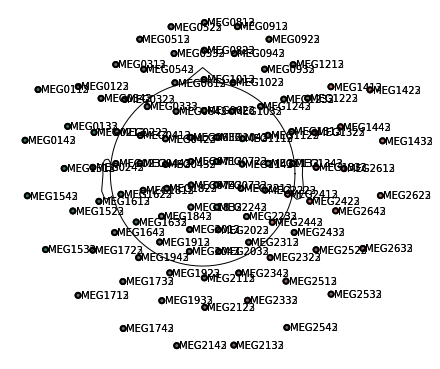

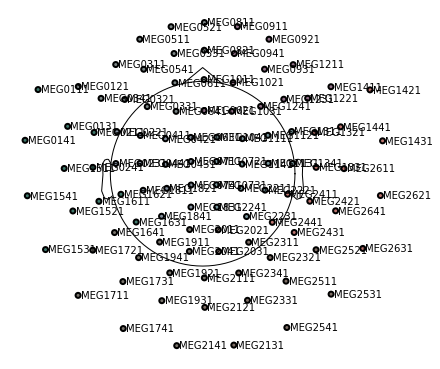

In [10]:
# Plot sensor locations
grad_chs, ax = epochs.plot_sensors(
    kind='select',
    ch_type='grad',
    title='Gradiometers Topomap',
    show_names=True, 
    ch_groups='position'
)

# grad_chs.savefig('gradiometers_topomap.png', dpi=300)

mag_chs, ax = epochs.plot_sensors(
    kind='select', 
    ch_type='mag', 
    title='Magnetometers Topomap', 
    show_names=True, 
    ch_groups='position'
)

# mag_chs.savefig('magnetometers_topomap.png', dpi=300) 

To identify which specific channels to choose for the ROIs (PFC, FFA, LOC, V1, V2) based on the sensor plot image, we can make some approximate selections.

1. Prefrontal Cortex (PFC): Channels located at the front of the head.
    - Magnetometer Channels: ['MEG0811', 'MEG0521', 'MEG0911', 'MEG0821', 'MEG0531', 'MEG0941', 'MEG0541', 'MEG0931']
    - Gradiometer Channels: ['MEG0812', 'MEG0522', 'MEG0912', 'MEG0822', 'MEG0532', 'MEG0942', 'MEG0542', 'MEG0932']
2. Fusiform Face Area (FFA): Channels located in the lower temporal regions.
    - Magnetometer Channels: ['MEG1611', 'MEG2421', 'MEG2621', 'MEG2641', 'MEG2632', 'MEG1541', 'MEG1521', 'MEG1531']
    - Gradiometer Channels: ['MEG1612', 'MEG2422', 'MEG2622', 'MEG2642', 'MEG2632', 'MEG1542', 'MEG1522', 'MEG1532']
3. Lateral Occipital Complex (LOC): Channels located in the lateral occipital regions.
    - Magnetometer Channels: ['MEG1611','MEG2421','MEG2621', 'MEG2641', 'MEG2632', 'MEG1541', 'MEG1521', 'MEG1531']
    - Gradiometer Channels: ['MEG1612','MEG2422','MEG2622', 'MEG2642', 'MEG2632', 'MEG1542', 'MEG1522', 'MEG1532']
4. Primary Visual Cortex (V1) and Secondary Visual Cortex (V2): Channels located at the back of the head and channels surrounding the V1 region.
    - Magnetometer Channels: ['MEG2111','MEG1931', 'MEG2331', 'MEG212', 'MEG1741', 'MEG2541', 'MEG2141', 'MEG2131']
    - Gradiometer Channels: ['MEG2112','MEG1932', 'MEG2332', 'MEG2122', 'MEG1742', 'MEG2542', 'MEG2142', 'MEG2132']
  
For functional connectivity analysis, gradiometers are generally preferred due to their ability to provide better spatial resolution and their reduced sensitivity to environmental noise. They are more effective in detecting subtle changes in neural activity and are less affected by noise, which is crucial for accurate functional connectivity analysis. However, complementing the analysis with magnetometers if necessary to capture a broader picture of neural activity.

## Magnetometer Channels

In [11]:
# Define regions of interest (ROIs) mag channels
PFC_mag_chs = ['MEG0811', 'MEG0521', 'MEG0911', 'MEG0821', 'MEG0531', 'MEG0941', 'MEG0541', 'MEG0931'] # Channel names
FFA_mag_chs = ['MEG1611', 'MEG2421', 'MEG2621', 'MEG2641', 'MEG2632', 'MEG1541', 'MEG1521', 'MEG1531'] # Right and left FFA
LOC_mag_chs = ['MEG2521', 'MEG2321', 'MEG2511', 'MEG2531', 'MEG1721', 'MEG1941', 'MEG1731', 'MEG1711'] # Right and left LOC
V1V2_mag_chs = ['MEG2111','MEG1931', 'MEG2331', 'MEG2121', 'MEG1741', 'MEG2541', 'MEG2141', 'MEG2131']

## Gradiometer Channels

In [12]:
# Define regions of interest (ROIs) grad channels
# For final report: check wheter the position of channels ending in 3 is correct (it is the same as the channels ending in 2)
PFC_grad_chs = ['MEG0812', 'MEG0522', 'MEG0912', 'MEG0822', 'MEG0532', 'MEG0942', 'MEG0542', 'MEG0932'] # Channel names
FFA_grad_chs = ['MEG1612', 'MEG2422', 'MEG2622', 'MEG2642', 'MEG2632', 'MEG1542', 'MEG1522', 'MEG1532'] # Right and left FFA
LOC_grad_chs = ['MEG2522', 'MEG2322', 'MEG2512', 'MEG2532', 'MEG1722', 'MEG1942', 'MEG1732', 'MEG1712'] # Right and left LOC
V1V2_grad_chs = ['MEG2112','MEG1932', 'MEG2332', 'MEG2122', 'MEG1742', 'MEG2542', 'MEG2142', 'MEG2132']

# Functional Connectivity Analysis

In [13]:
# Function to get indices of channels in epochs
def get_channel_indices(epochs, channel_names):
    return [epochs.ch_names.index(ch) for ch in channel_names]

In [14]:
# Define frequency bands of interest
beta_band = (13, 30)
gamma_band = (30, 100)

# Filter epochs to beta and gamma bands
epochs_beta = epochs_filtered.copy().filter(beta_band[0], beta_band[1], fir_design='firwin')
epochs_gamma = epochs_filtered.copy().filter(gamma_band[0], gamma_band[1], fir_design='firwin')

Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1017 samples (1.017 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 124848 out of 124848 | elapsed:   54.9s finished


Setting up band-pass filter from 30 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 441 samples (0.441 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 124848 out of 124848 | elapsed:   37.1s finished


In [15]:
# Run functional connectivity between two ROIs using channel names
def functional_connectivity(method: str, chs_1: list, chs_2: list):
    sfreq = epochs_filtered.info['sfreq']  # Sampling frequency = 1000 Hz
    faverage = True  # Average connectivity measures across frequencies
    verbose = False

    # Select the specific channels for beta and gamma epochs for both ROIs
    epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)
    epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)

    # Get indices of the selected channels
    indices_1 = [epochs_beta_picked.ch_names.index(ch) for ch in chs_1]
    indices_2 = [epochs_beta_picked.ch_names.index(ch) for ch in chs_2]

    fc_beta = spectral_connectivity_epochs(
        epochs_beta_picked,
        method=method,
        indices=(indices_1, indices_2),
        sfreq=sfreq,
        fmin=beta_band[0],
        fmax=beta_band[1],
        faverage=faverage,
        verbose=verbose
    )

    fc_gamma = spectral_connectivity_epochs(
        epochs_gamma_picked,
        method=method,
        indices=(indices_1, indices_2),
        sfreq=sfreq,
        fmin=gamma_band[0],
        fmax=gamma_band[1],
        faverage=faverage,
        verbose=verbose
    )

    return fc_beta, fc_gamma

In [16]:
def plot_connectivity_matrix(fc, title, channel_names, save_path=None):
    conn_data = fc.get_data(output='dense')
    n_freqs = conn_data.shape[2]  # Number of frequency bands

    for freq_idx in range(n_freqs):
        conn_matrix = conn_data[:, :, freq_idx]

        # Check the range of connectivity values
        print(f"Frequency Band Index: {freq_idx}")
        print(f"Min value: {np.min(conn_matrix)}, Max value: {np.max(conn_matrix)}")

        plt.figure(figsize=(12, 10))
        ax = sns.heatmap(conn_matrix, xticklabels=channel_names, yticklabels=channel_names, cmap='viridis', annot=True, fmt='.2f', vmin=0, vmax=1)
        plt.title(f"{title} (Frequency Band Index: {freq_idx})")
        plt.xlabel('Channels')
        plt.ylabel('Channels')
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        cbar = ax.collections[0].colorbar
        cbar.set_label('Connectivity', rotation=270, labelpad=15)
        plt.tight_layout()

        if save_path:
            # Ensure directory exists
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            plt.savefig(f"{save_path}.png")  # Save the figure with a unique name per frequency band

        plt.show()

## Test predictions

*IMPORTANT COMMENT*: The connectivity analysis has a bug that includes NaN values to the connectivity matrix, thus rendering a lot of the image white and its interpretation practically ineffecive. This bug will be fixed for the final report, where the final results will be shown. It is possible that we also change the plot to other type of graph.

In [17]:
def predict(fc_method, pfc_or_v_chs, ffa_chs, loc_chs, save_path): # Tests GNWT and IIT predictions
    # For the final report: separate face and object events, and include task-irrelevant events
    beta_1, gamma_1 = functional_connectivity(method=fc_method, chs_1=pfc_or_v_chs, chs_2=ffa_chs)
    beta_2, gamma_2 = functional_connectivity(method=fc_method, chs_1=pfc_or_v_chs, chs_2=loc_chs)
    
    plot_connectivity_matrix(
        beta_1, 
        f"{fc_method} - Beta Band - PFC or V1/V2 vs FFA", 
        pfc_or_v_chs + ffa_chs, 
        save_path=save_path + '_FFA_beta'
    )
   
    plot_connectivity_matrix(
        gamma_1, 
        f"{fc_method} - Gamma Band - PFC or V1/V2 vs FFA", 
        pfc_or_v_chs + ffa_chs,
        save_path=save_path + '_FFA_gamma'
    )

    plot_connectivity_matrix(
        beta_2, 
        f"{fc_method} - Beta Band - PFC or V1/V2 vs LOC", 
        pfc_or_v_chs + loc_chs, 
        save_path=save_path + '_LOC_beta'
    )
   
    plot_connectivity_matrix(
        gamma_2, 
        f"{fc_method} - Gamma Band - PFC or V1/V2 vs LOC", 
        pfc_or_v_chs + loc_chs,
        save_path=save_path + '_LOC_gamma'
    )

### GWNT predictions (gradiometers)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


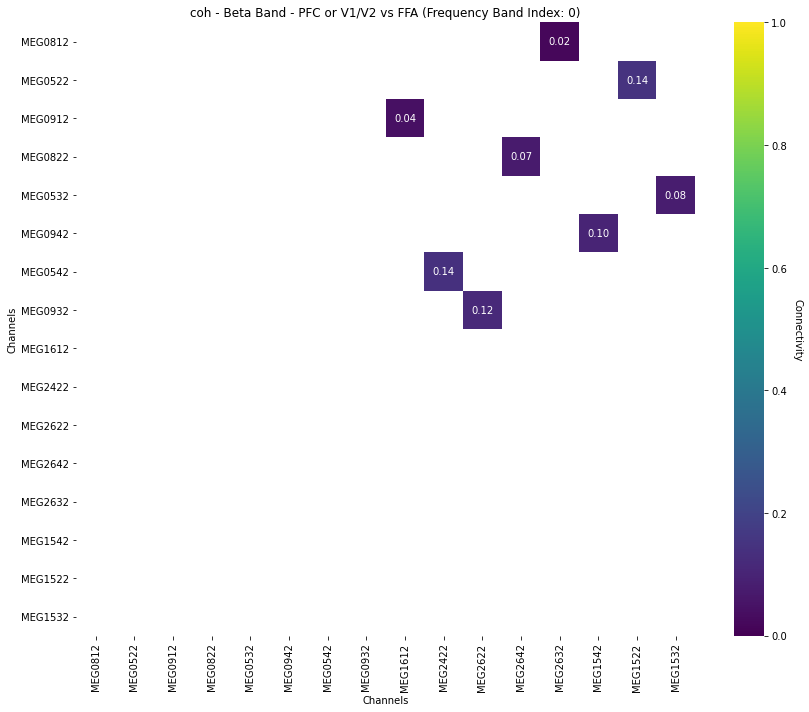

Frequency Band Index: 0
Min value: nan, Max value: nan


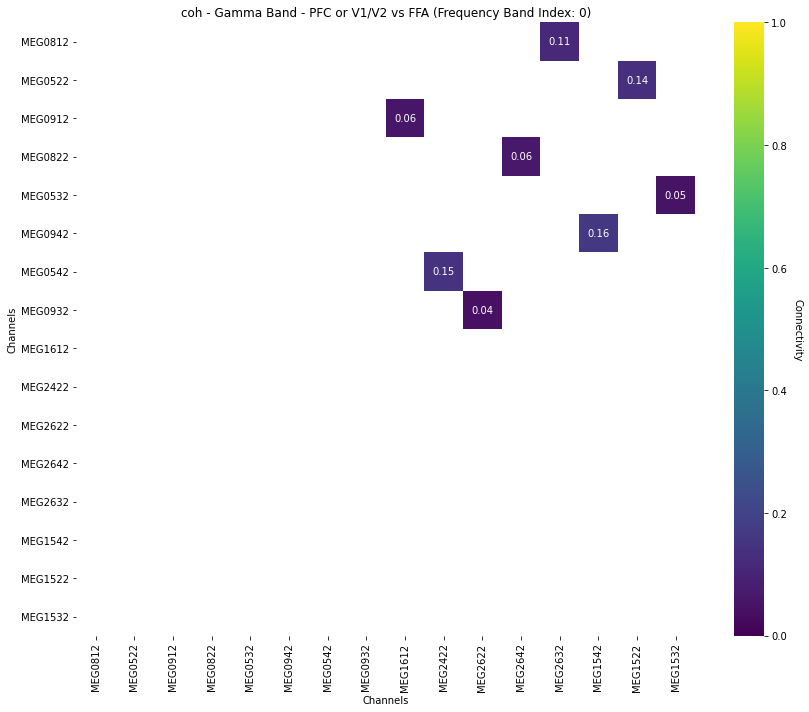

Frequency Band Index: 0
Min value: nan, Max value: nan


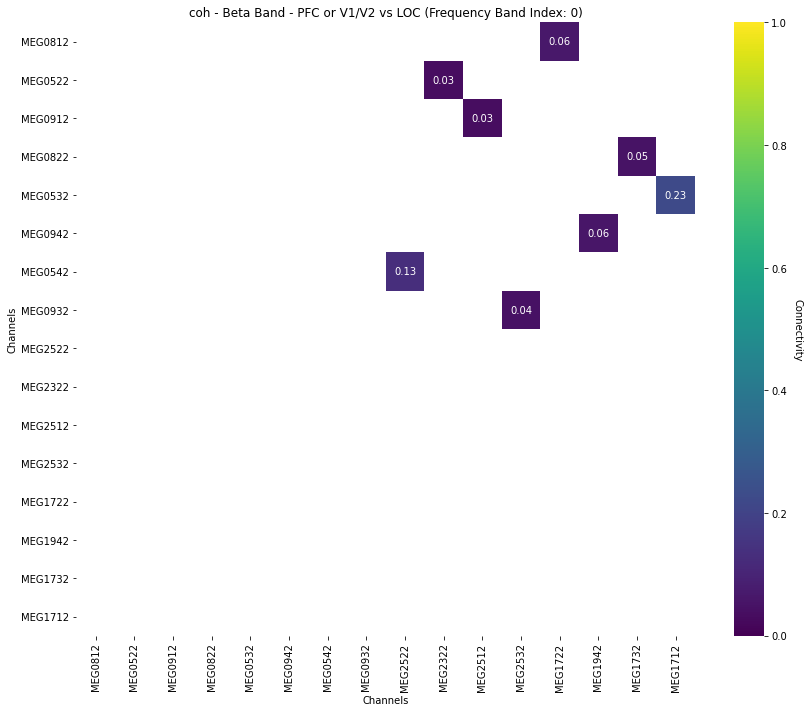

Frequency Band Index: 0
Min value: nan, Max value: nan


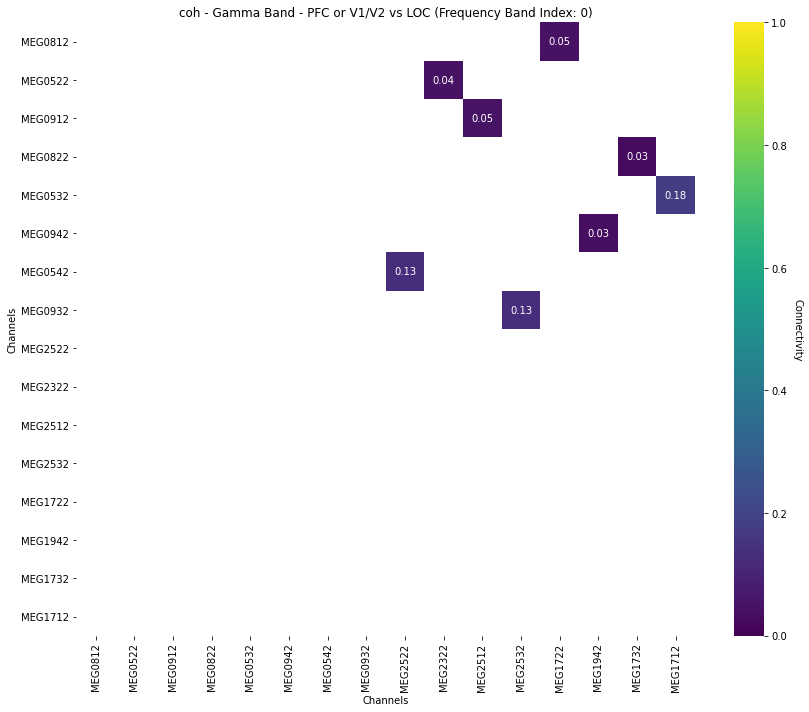

In [18]:
predict('coh', PFC_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/coh_grad_PFC')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


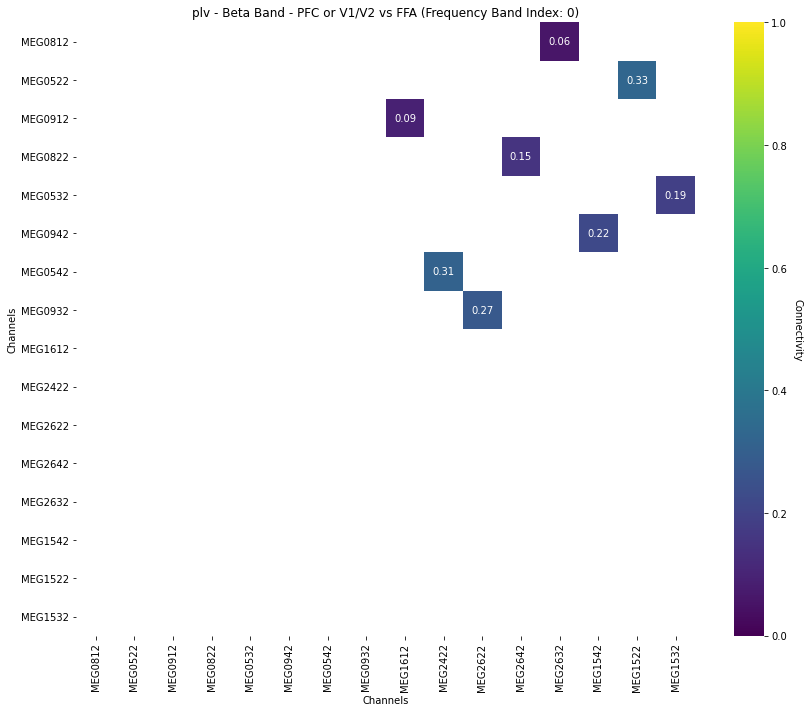

Frequency Band Index: 0
Min value: nan, Max value: nan


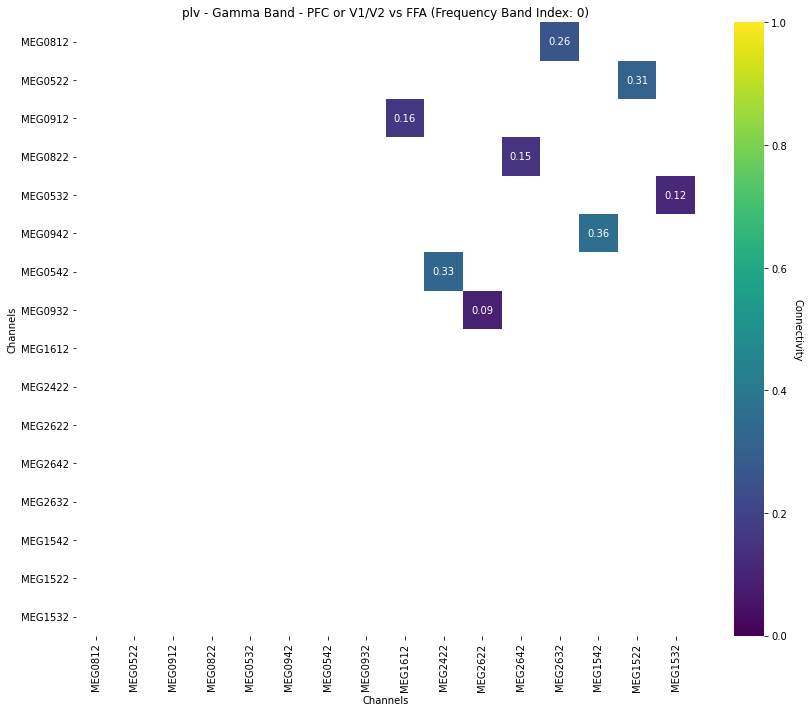

Frequency Band Index: 0
Min value: nan, Max value: nan


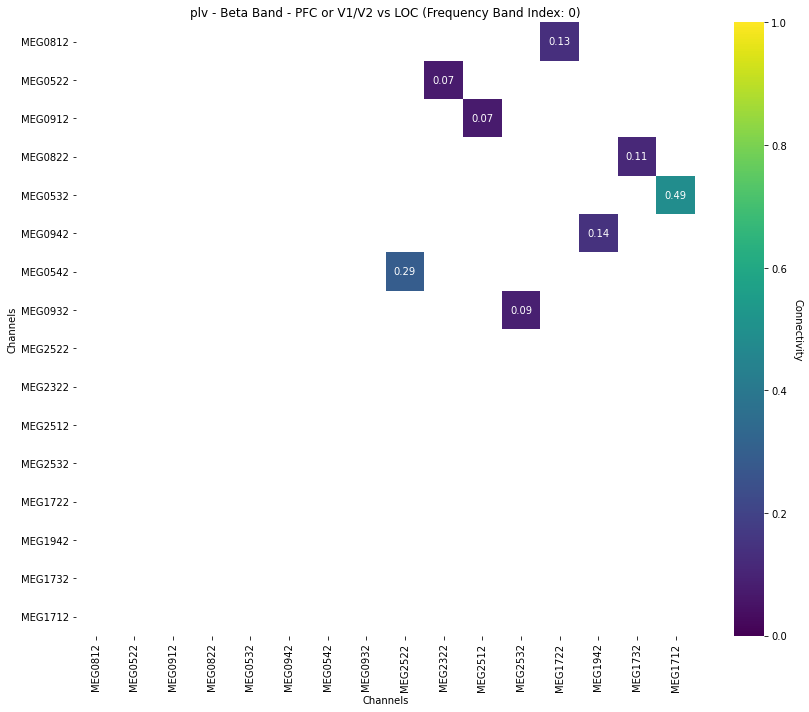

Frequency Band Index: 0
Min value: nan, Max value: nan


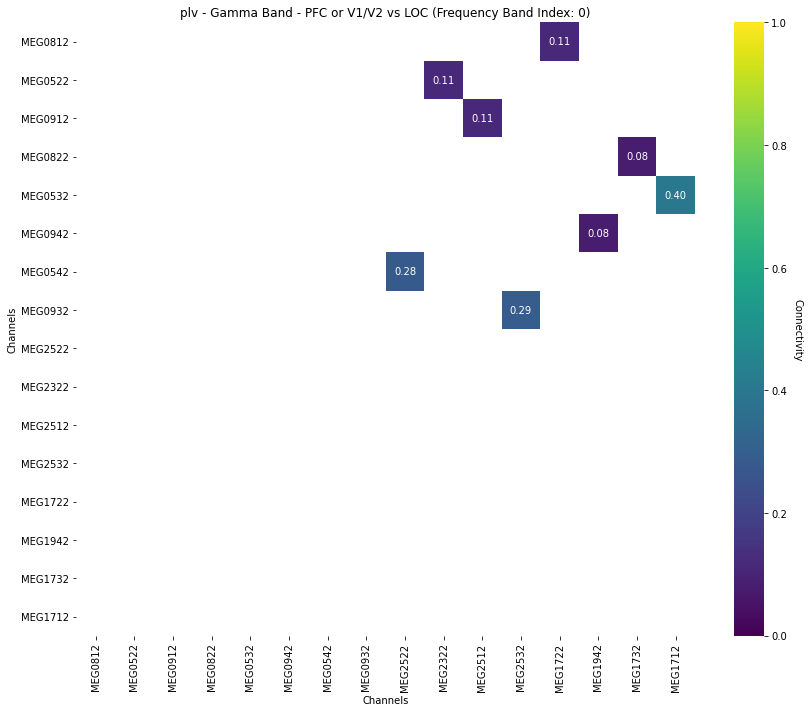

In [19]:
predict('plv', PFC_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/plv_grad_PFC')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


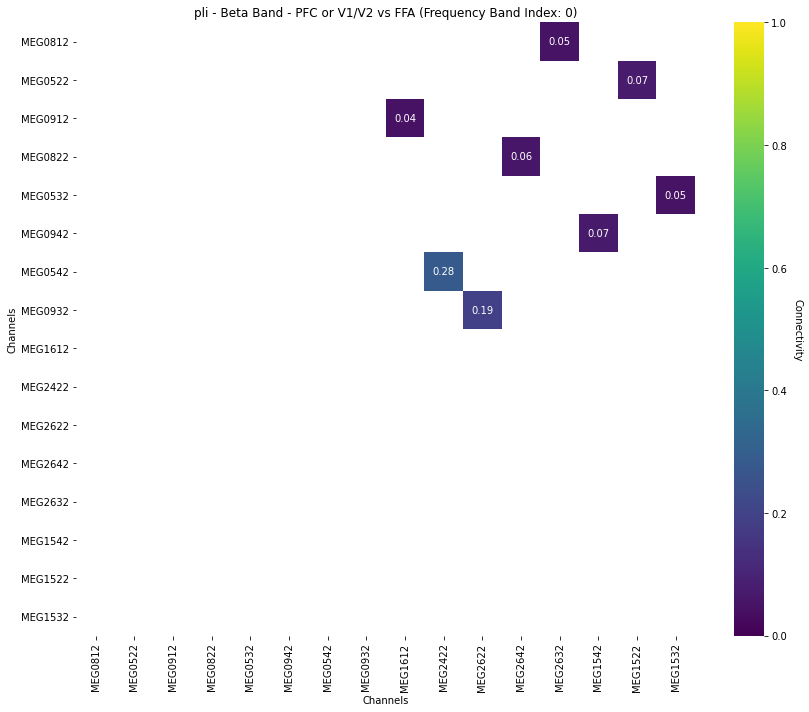

Frequency Band Index: 0
Min value: nan, Max value: nan


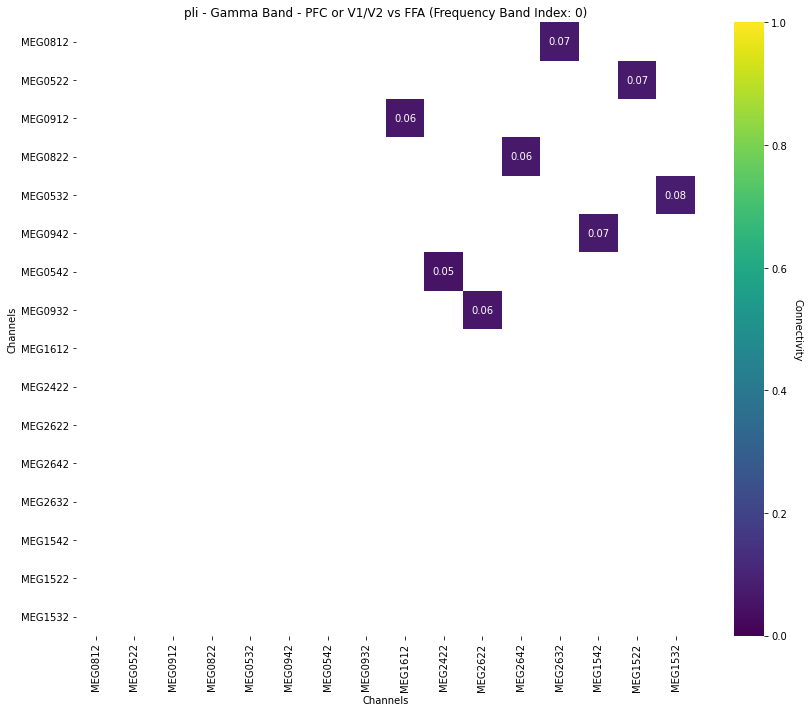

Frequency Band Index: 0
Min value: nan, Max value: nan


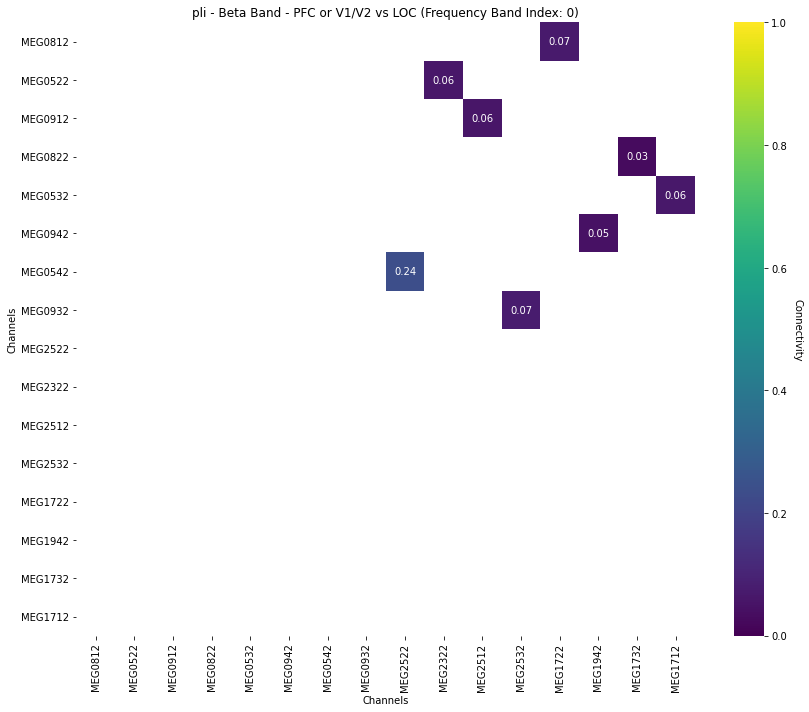

Frequency Band Index: 0
Min value: nan, Max value: nan


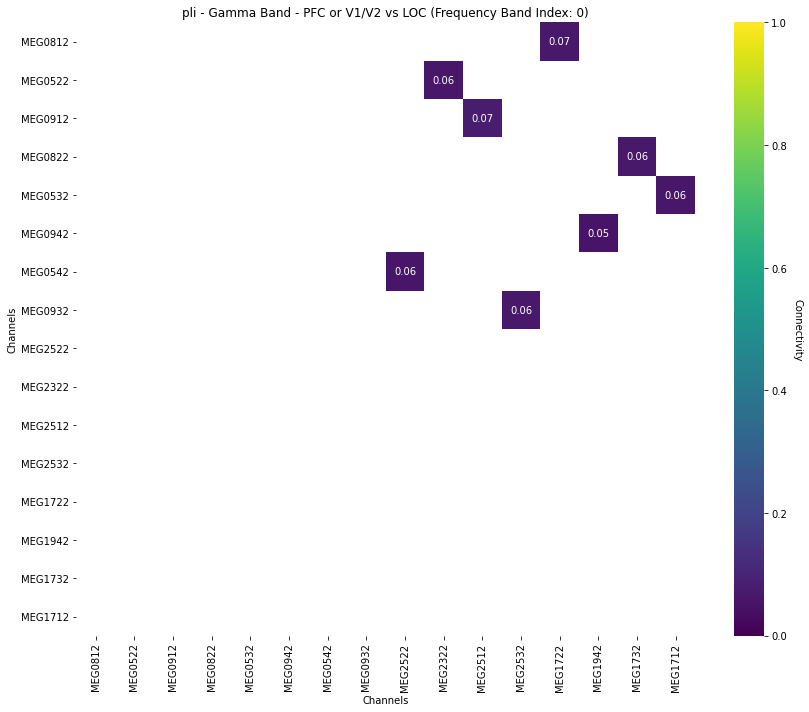

In [20]:
predict('pli', PFC_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/pli_grad_PFC')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


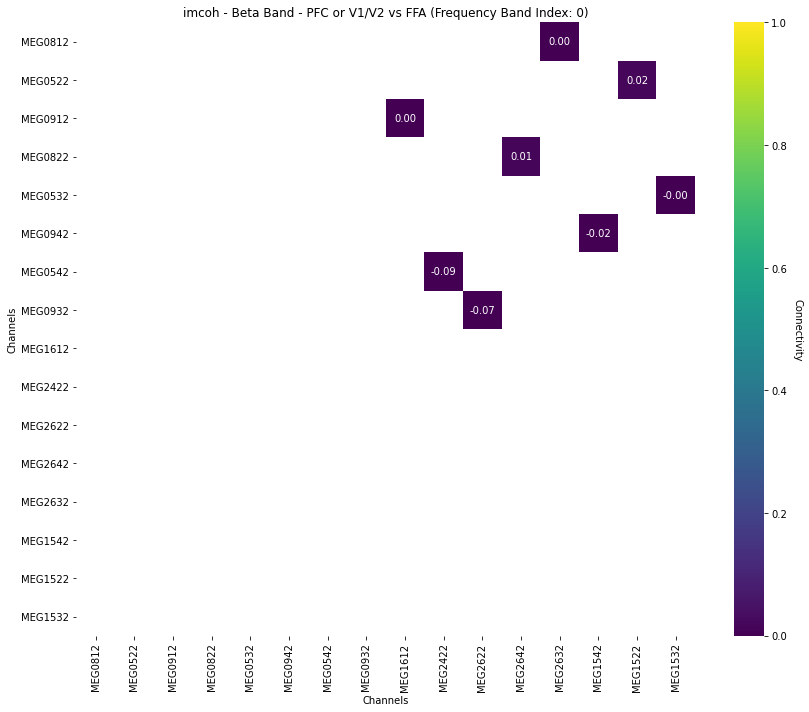

Frequency Band Index: 0
Min value: nan, Max value: nan


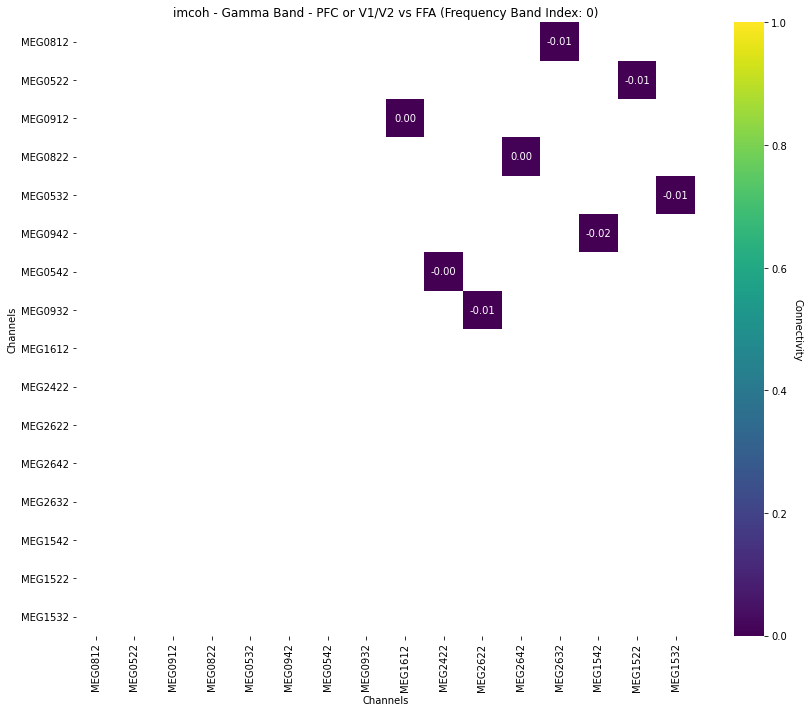

Frequency Band Index: 0
Min value: nan, Max value: nan


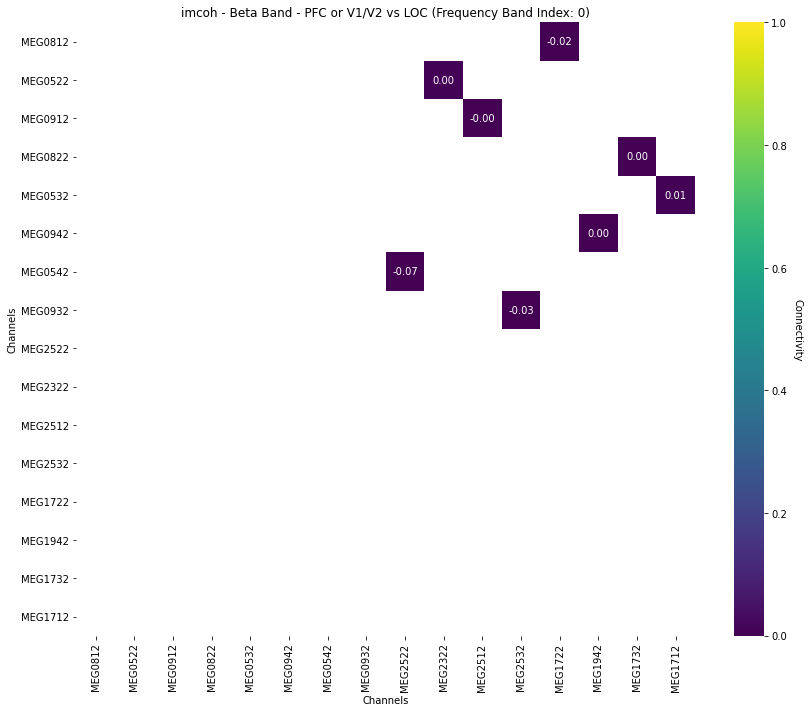

Frequency Band Index: 0
Min value: nan, Max value: nan


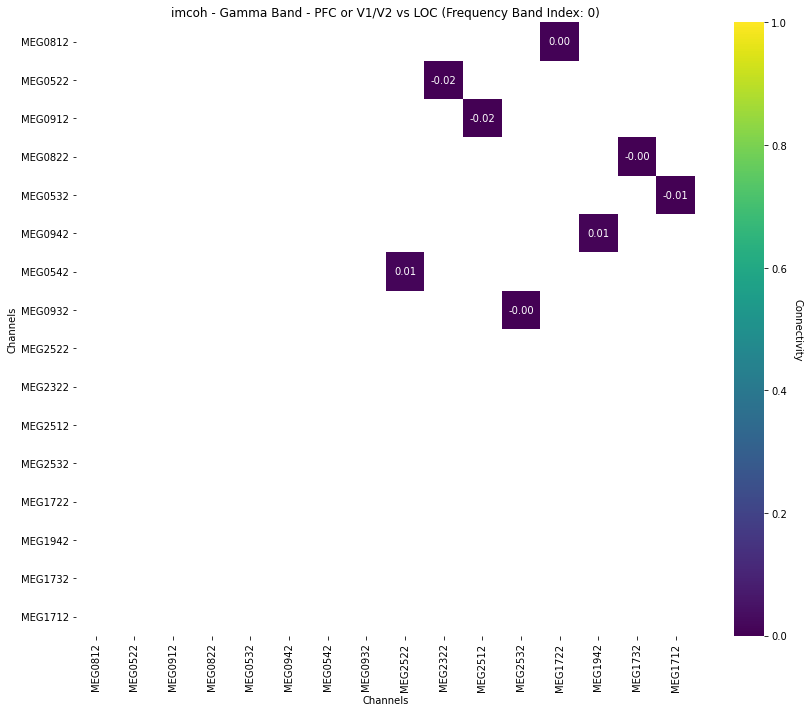

In [21]:
predict('imcoh', PFC_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/imcoh_grad_PFC')

In [22]:
# predict('gc', PFC_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/gc_grad_PFC')

### GWNT predictions (magnetometers)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


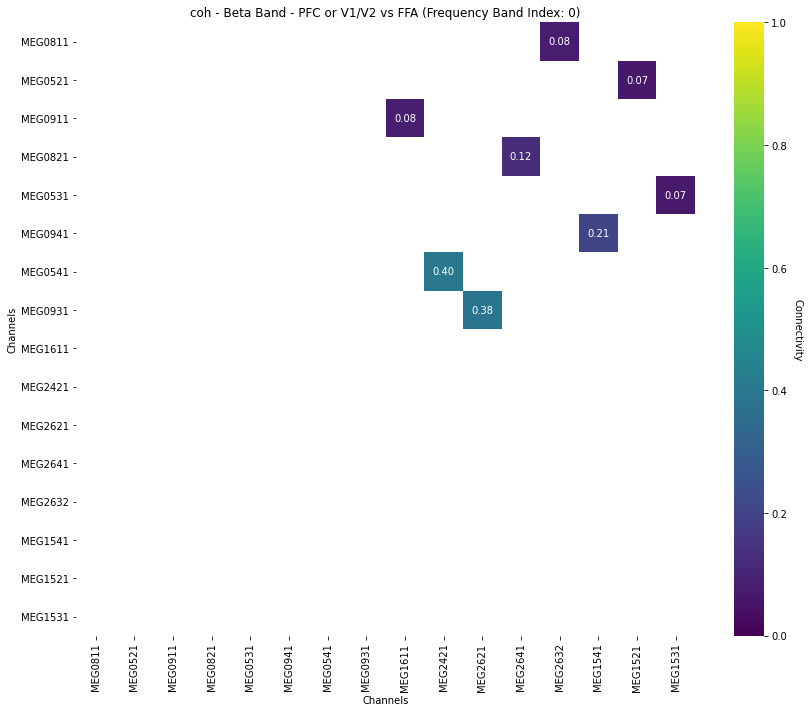

Frequency Band Index: 0
Min value: nan, Max value: nan


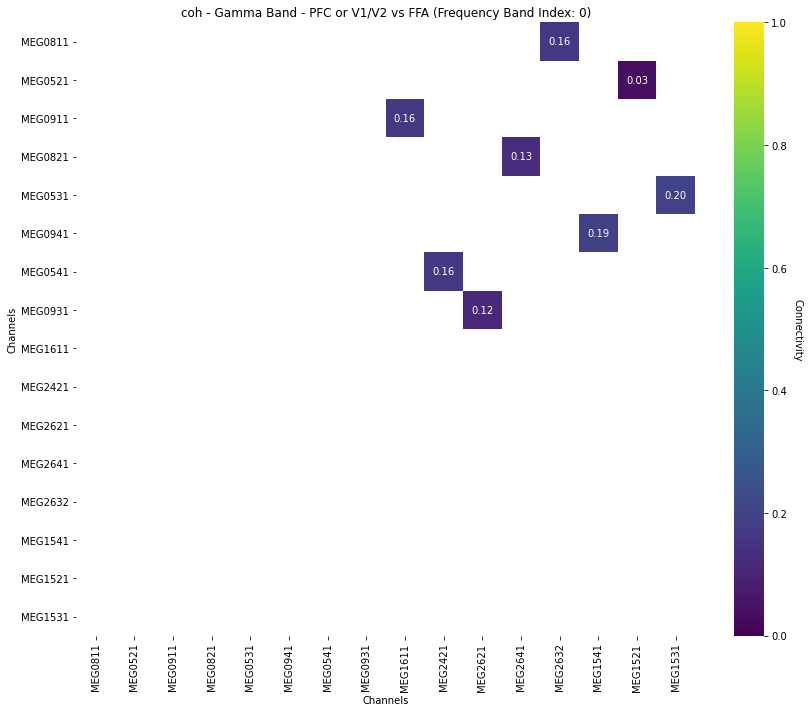

Frequency Band Index: 0
Min value: nan, Max value: nan


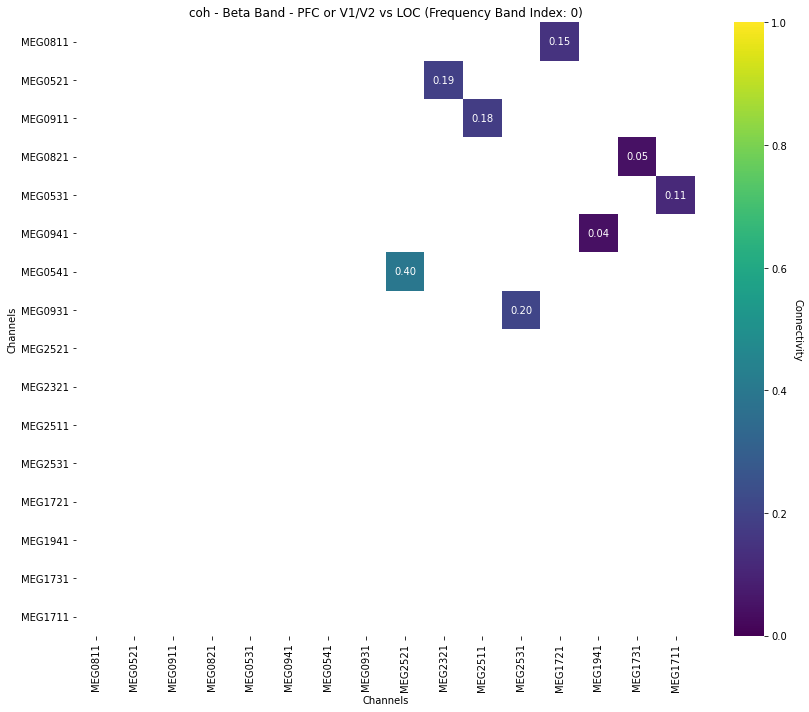

Frequency Band Index: 0
Min value: nan, Max value: nan


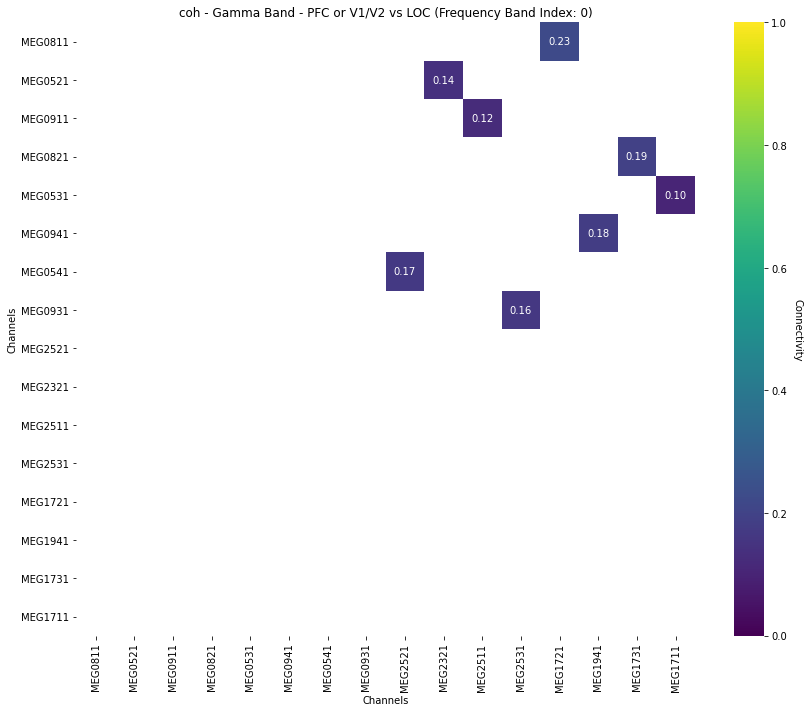

In [23]:
predict('coh', PFC_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/coh_mag_PFC') # Coherence

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


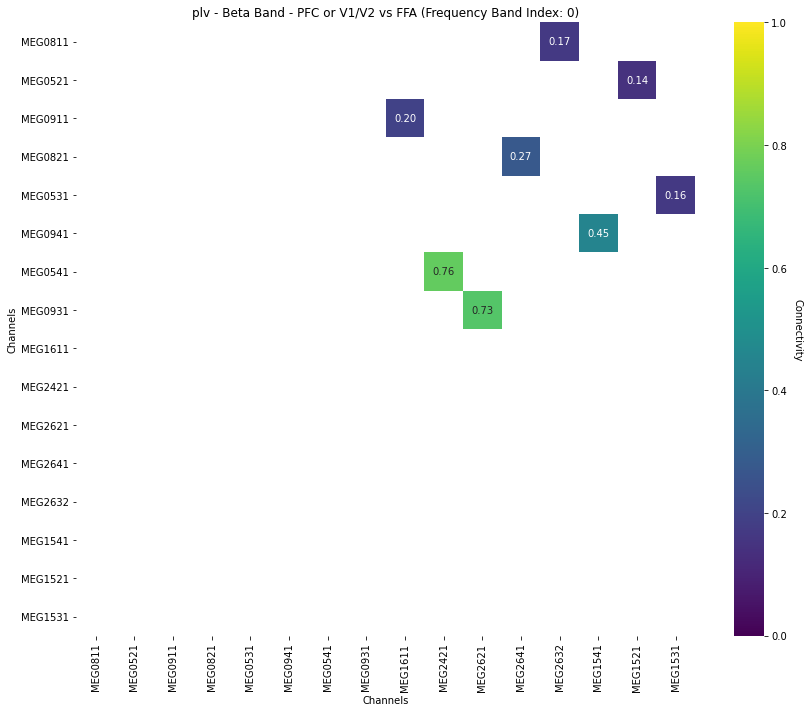

Frequency Band Index: 0
Min value: nan, Max value: nan


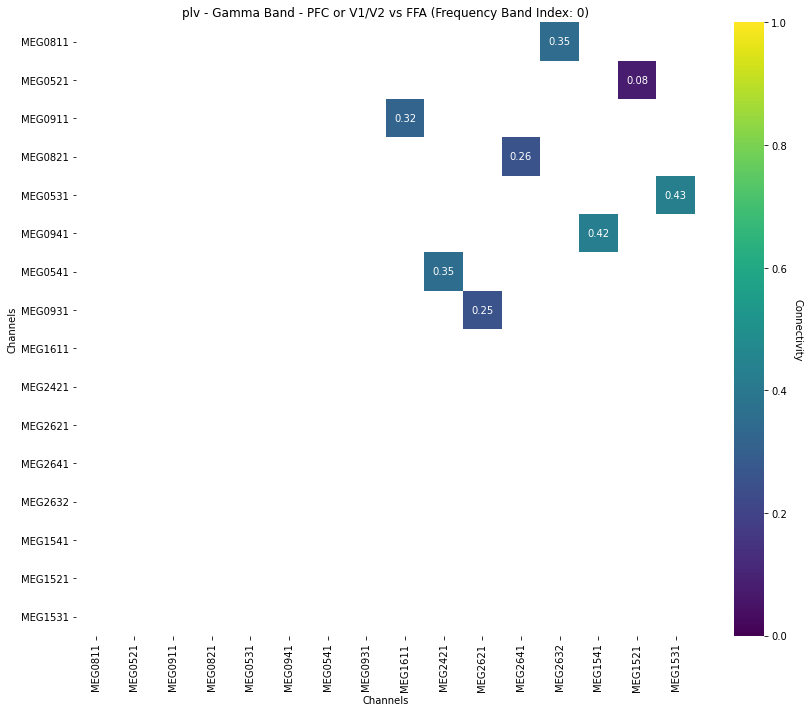

Frequency Band Index: 0
Min value: nan, Max value: nan


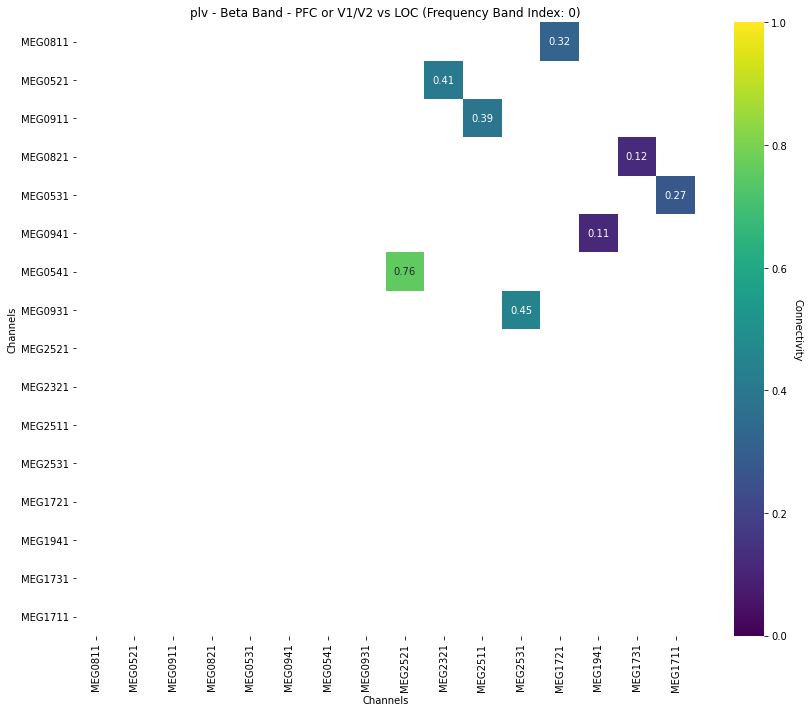

Frequency Band Index: 0
Min value: nan, Max value: nan


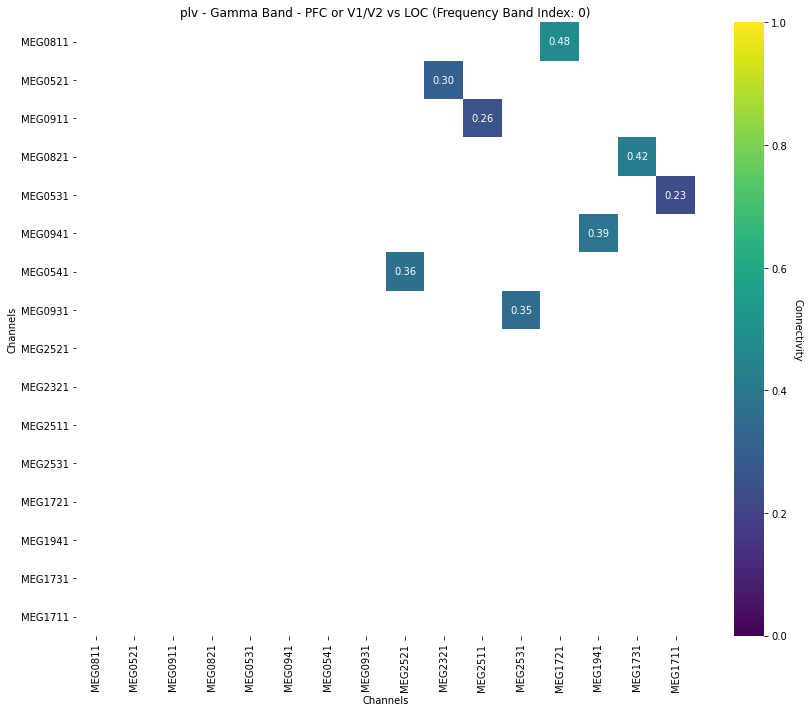

In [24]:
predict('plv', PFC_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/plv_mag_PFC') # PLV

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


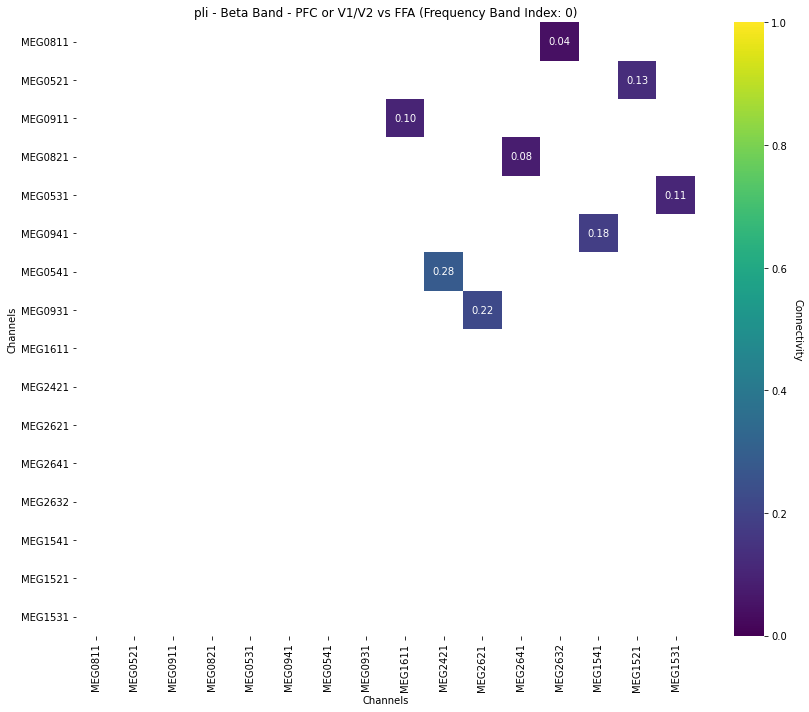

Frequency Band Index: 0
Min value: nan, Max value: nan


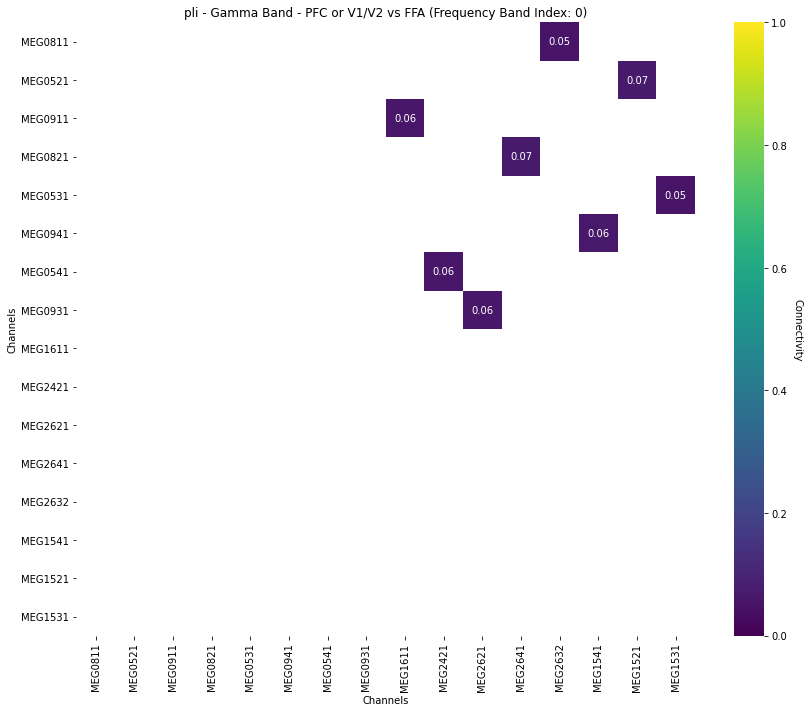

Frequency Band Index: 0
Min value: nan, Max value: nan


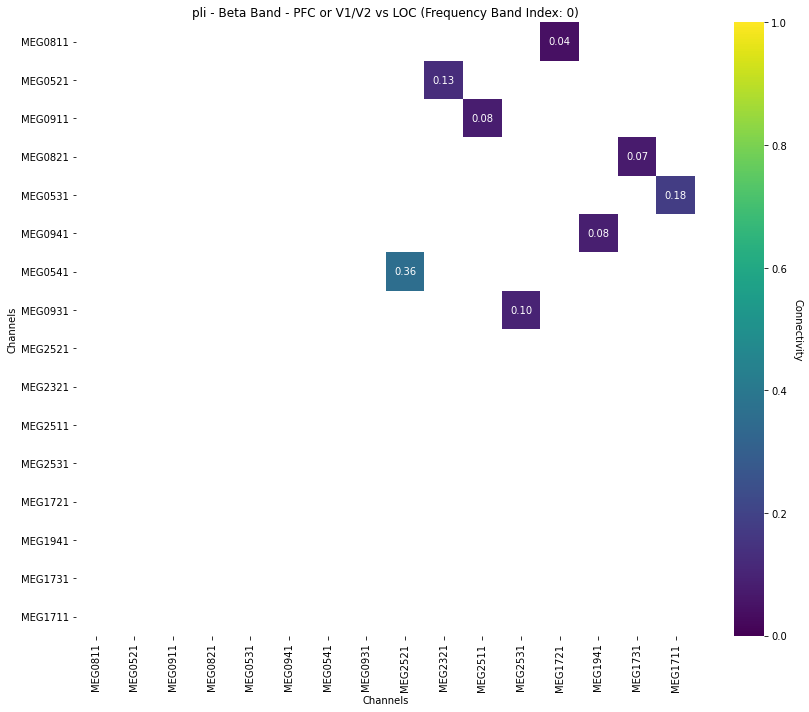

Frequency Band Index: 0
Min value: nan, Max value: nan


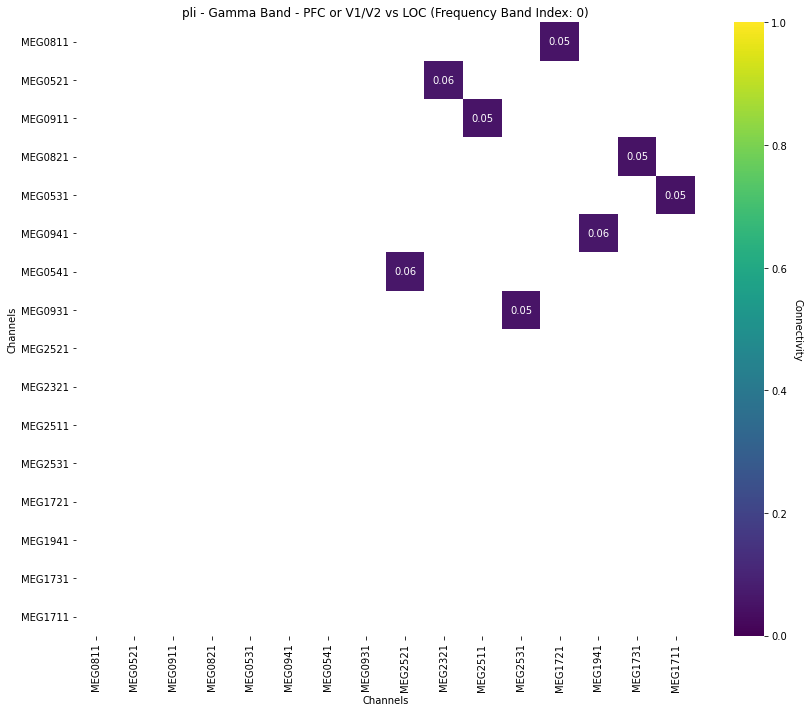

In [25]:
predict('pli', PFC_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/pli_mag_PFC') # PLI

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


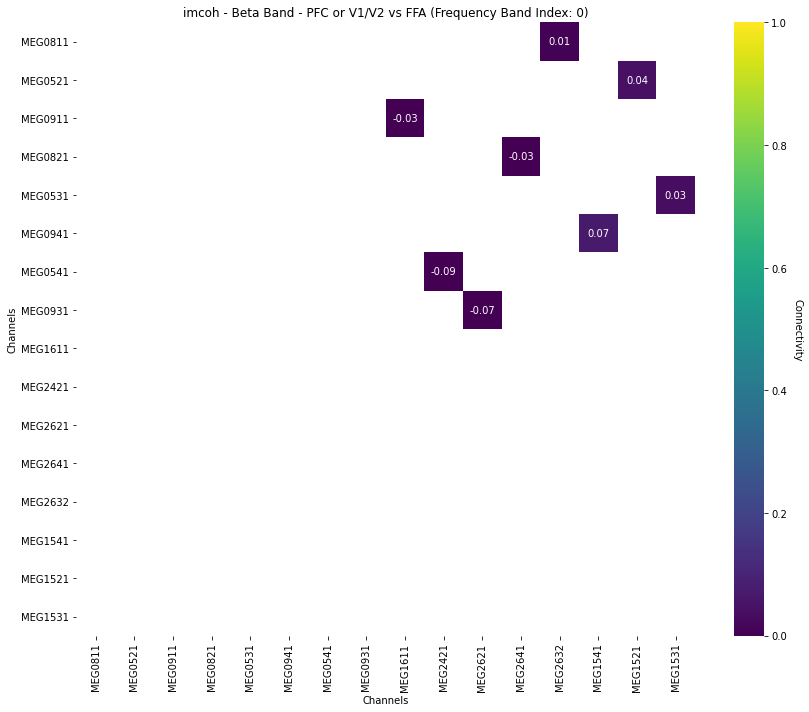

Frequency Band Index: 0
Min value: nan, Max value: nan


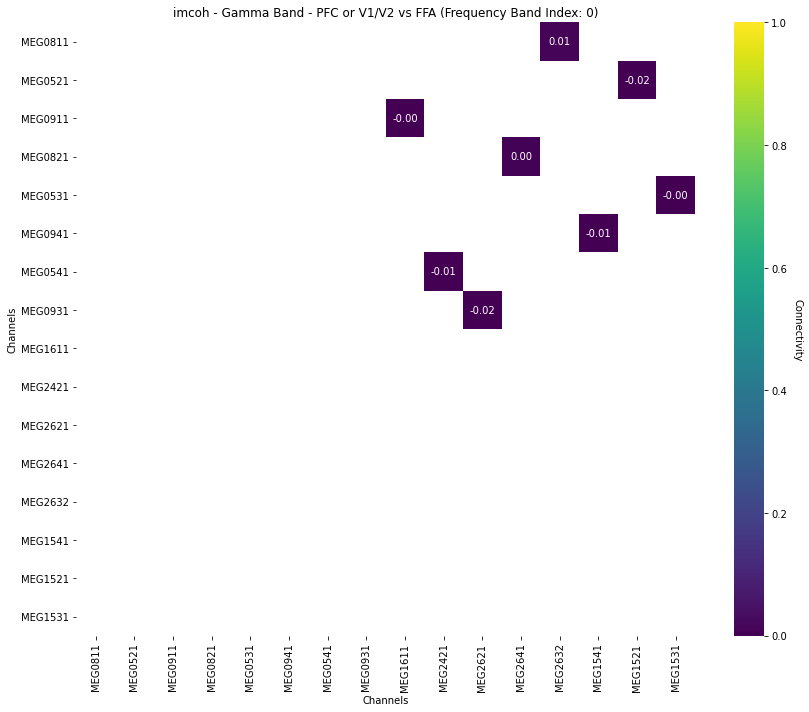

Frequency Band Index: 0
Min value: nan, Max value: nan


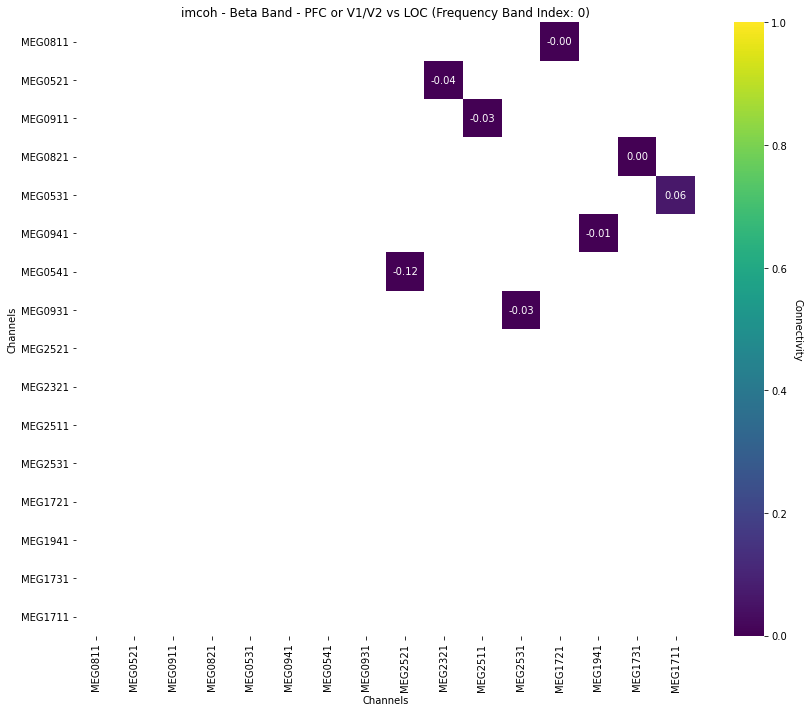

Frequency Band Index: 0
Min value: nan, Max value: nan


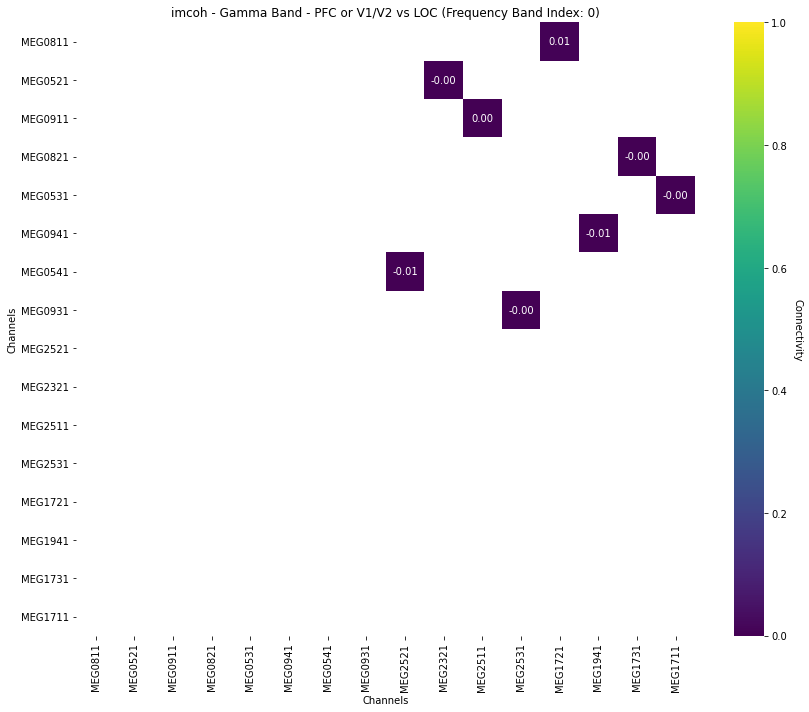

In [26]:
predict('imcoh', PFC_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/imcoh_mag_PFC') # Imaginary Coherence

In [27]:
# predict('gc', PFC_mag_chs, FFA_grad_chs, LOC_grad_chs, 'results/gc_mag_PFC') # Granger causality

### IIT predictions (gradiometers)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


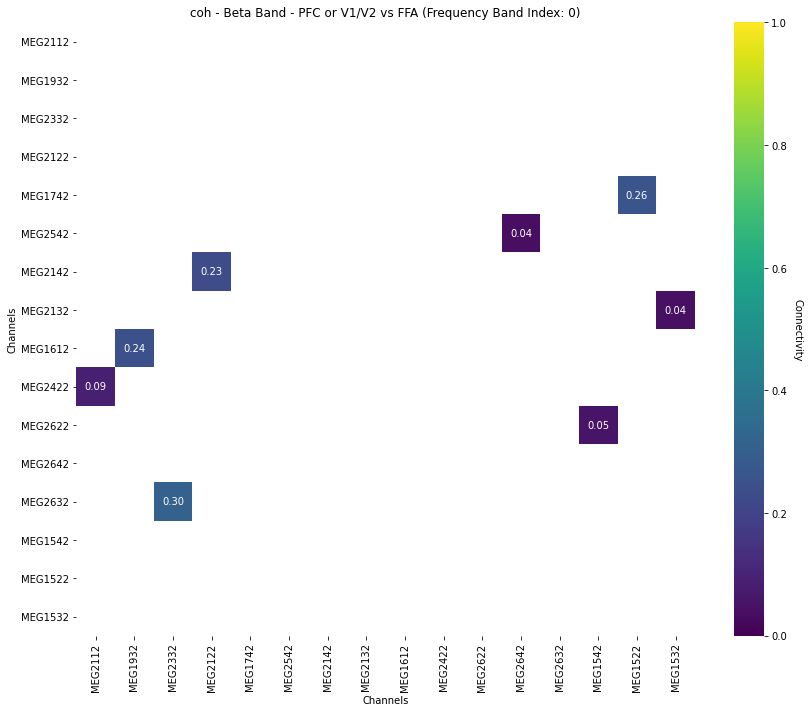

Frequency Band Index: 0
Min value: nan, Max value: nan


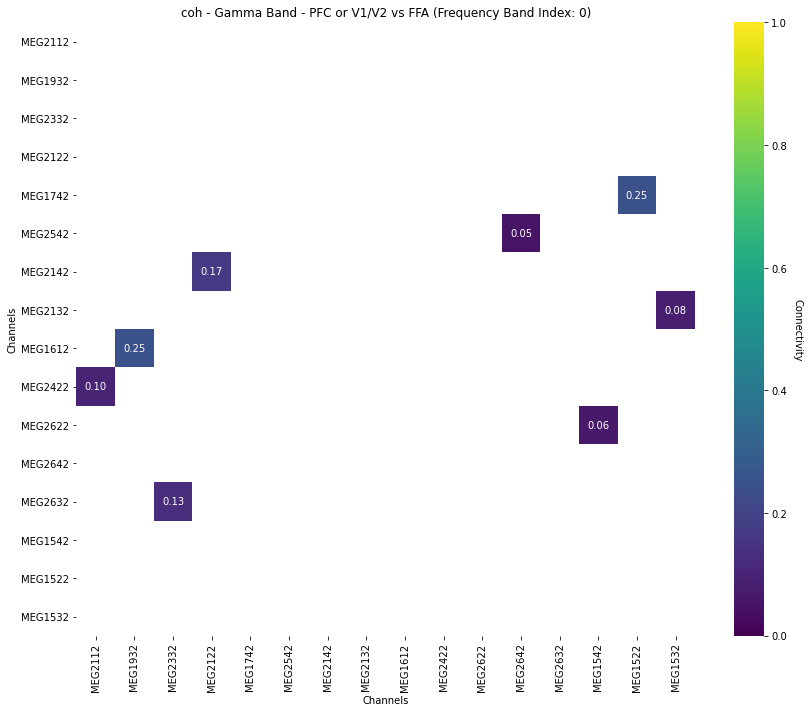

Frequency Band Index: 0
Min value: nan, Max value: nan


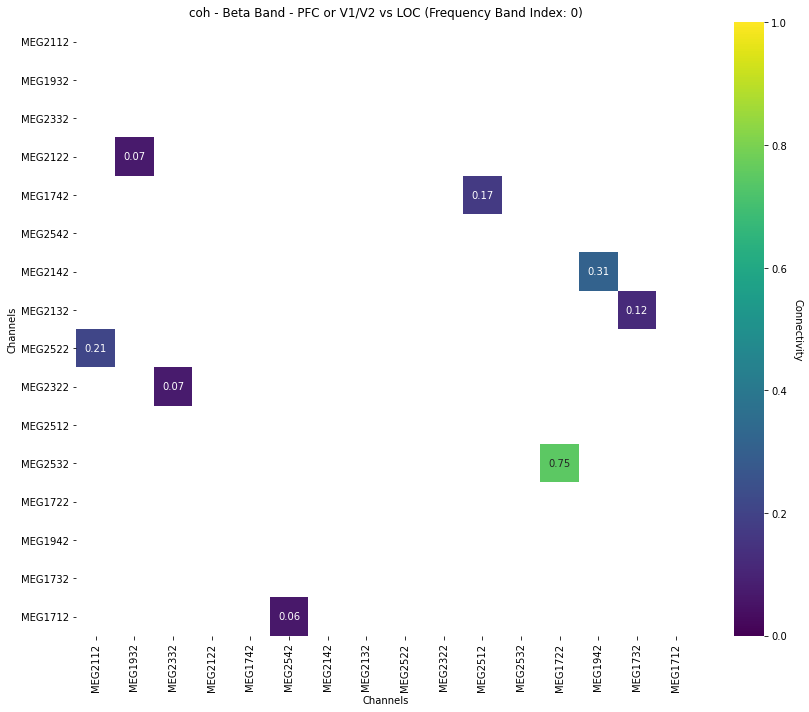

Frequency Band Index: 0
Min value: nan, Max value: nan


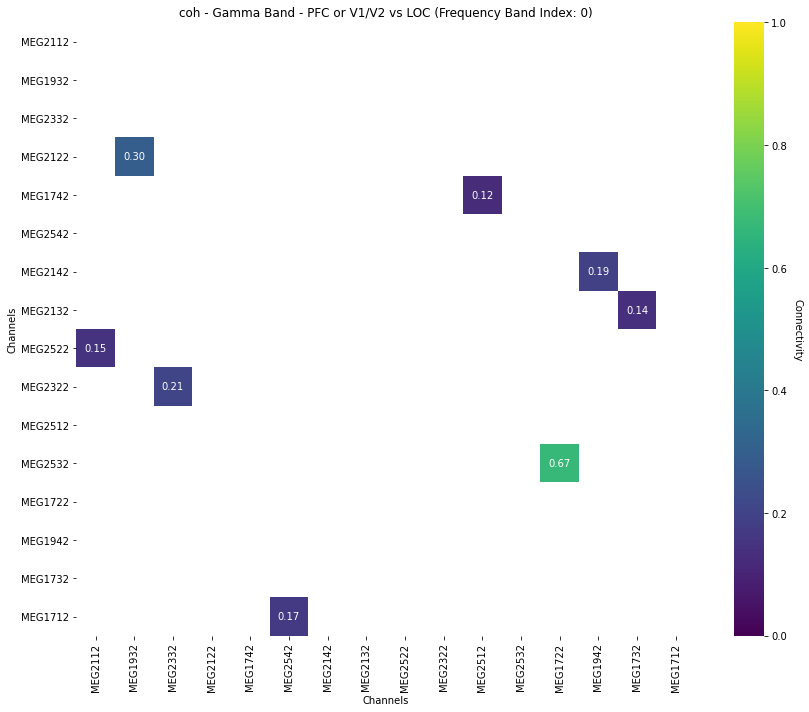

In [28]:
predict('coh', V1V2_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/coh_grad_V1V2')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


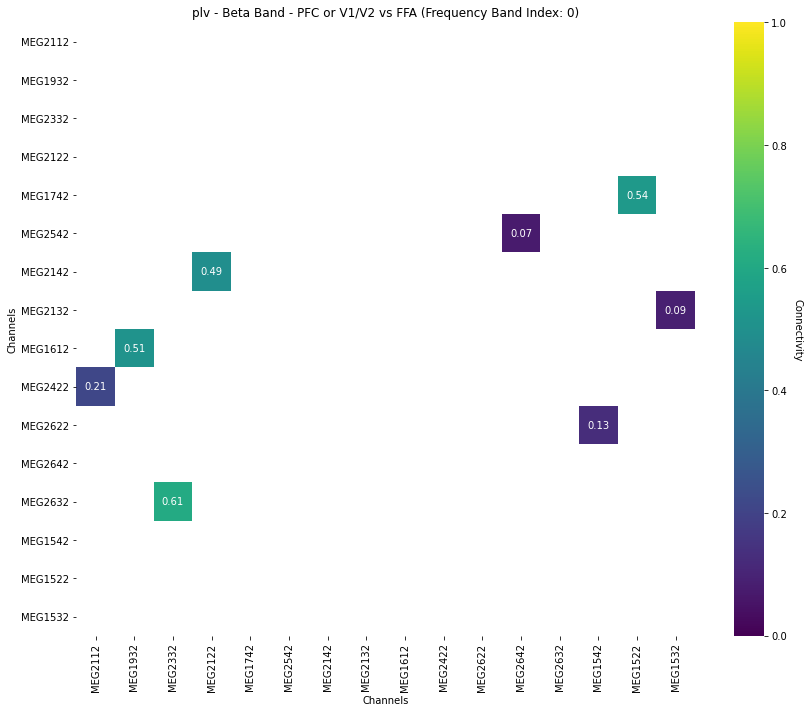

Frequency Band Index: 0
Min value: nan, Max value: nan


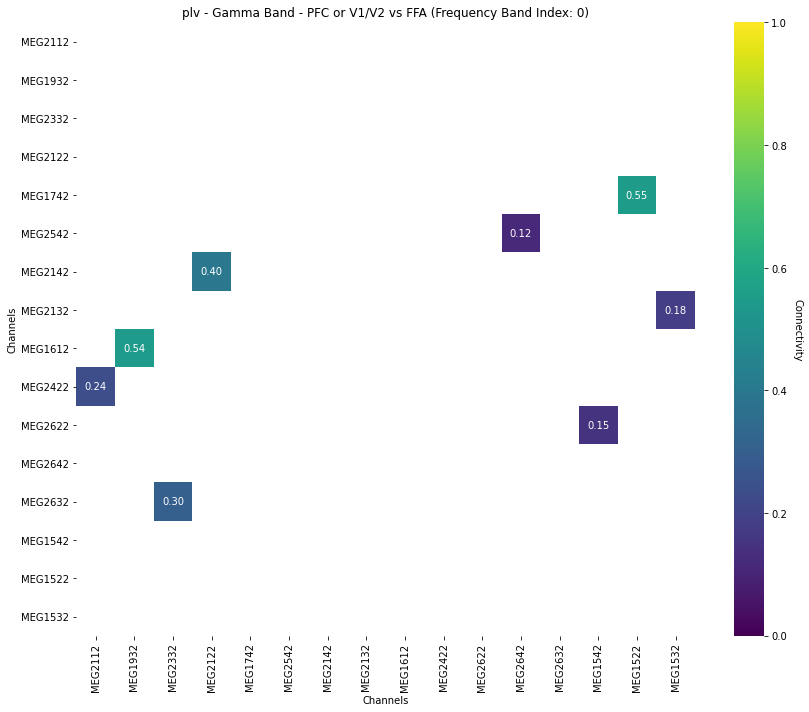

Frequency Band Index: 0
Min value: nan, Max value: nan


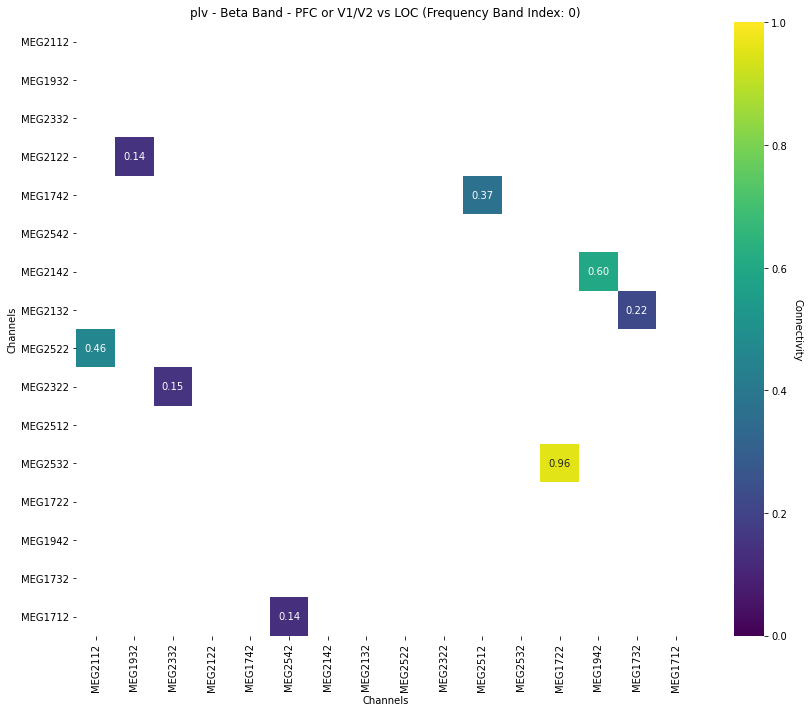

Frequency Band Index: 0
Min value: nan, Max value: nan


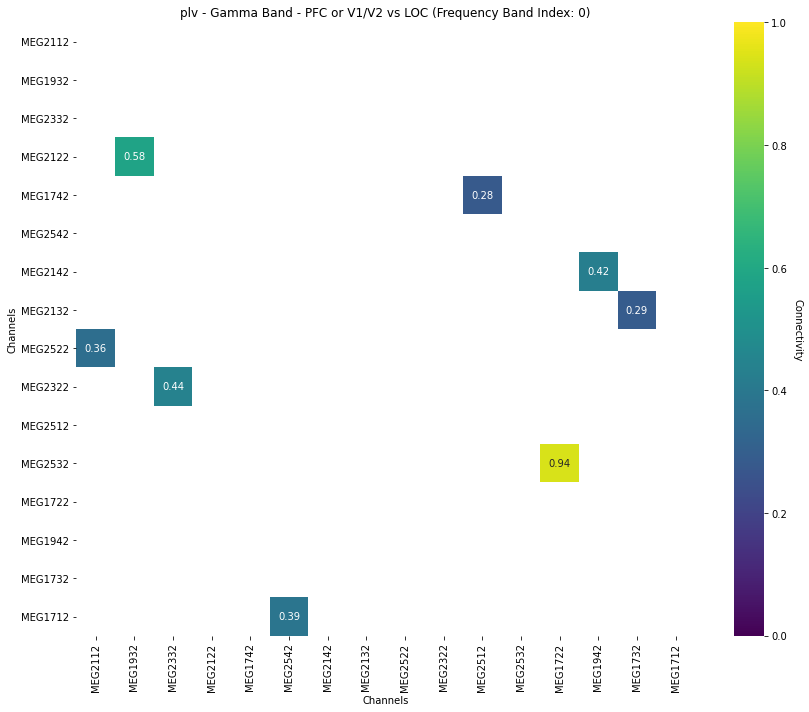

In [29]:
predict('plv', V1V2_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/plv_grad_V1V2')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


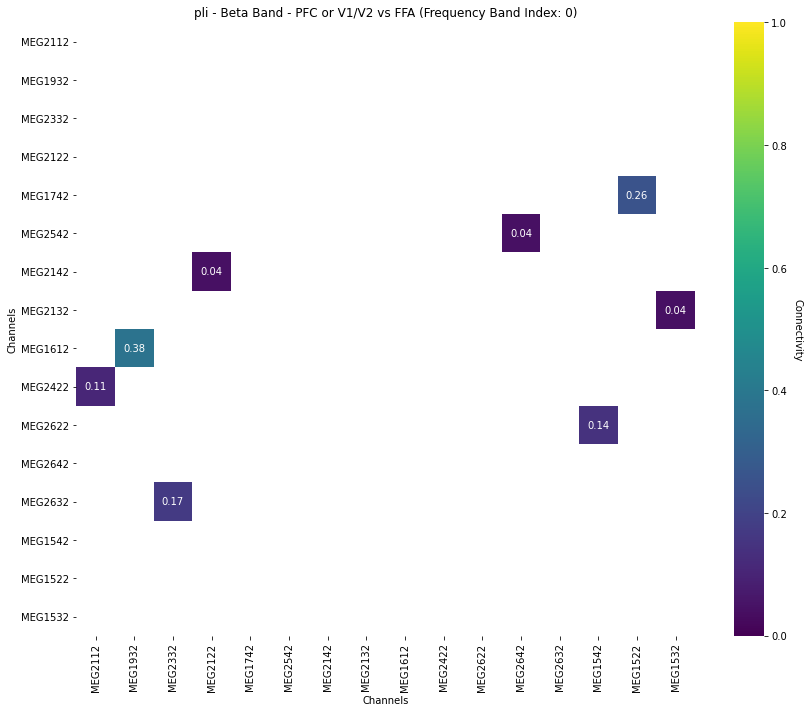

Frequency Band Index: 0
Min value: nan, Max value: nan


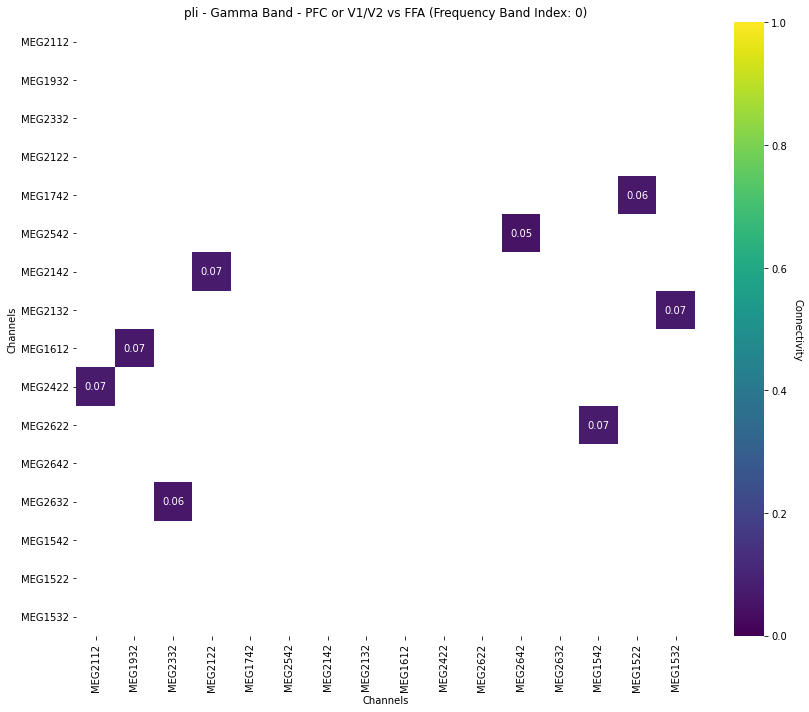

Frequency Band Index: 0
Min value: nan, Max value: nan


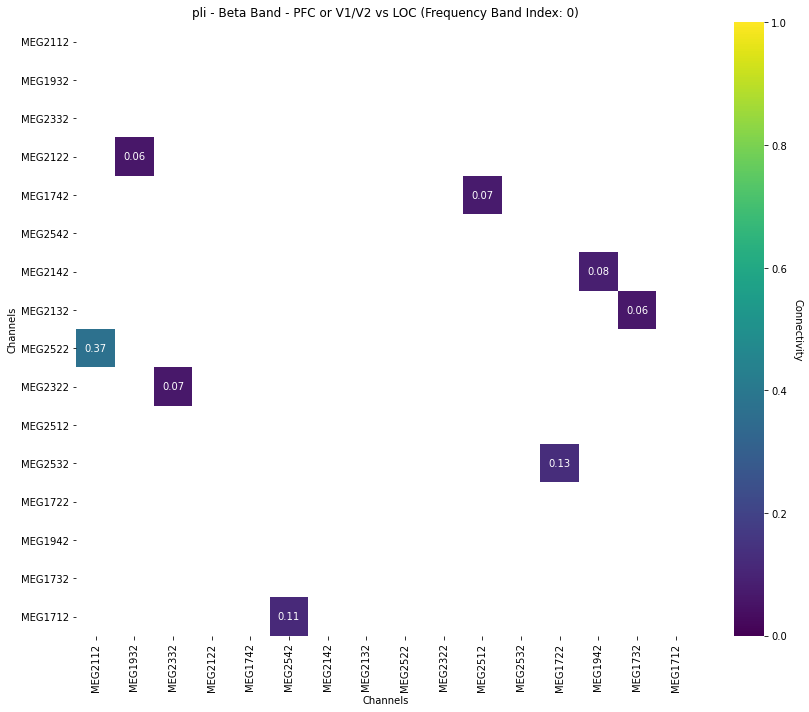

Frequency Band Index: 0
Min value: nan, Max value: nan


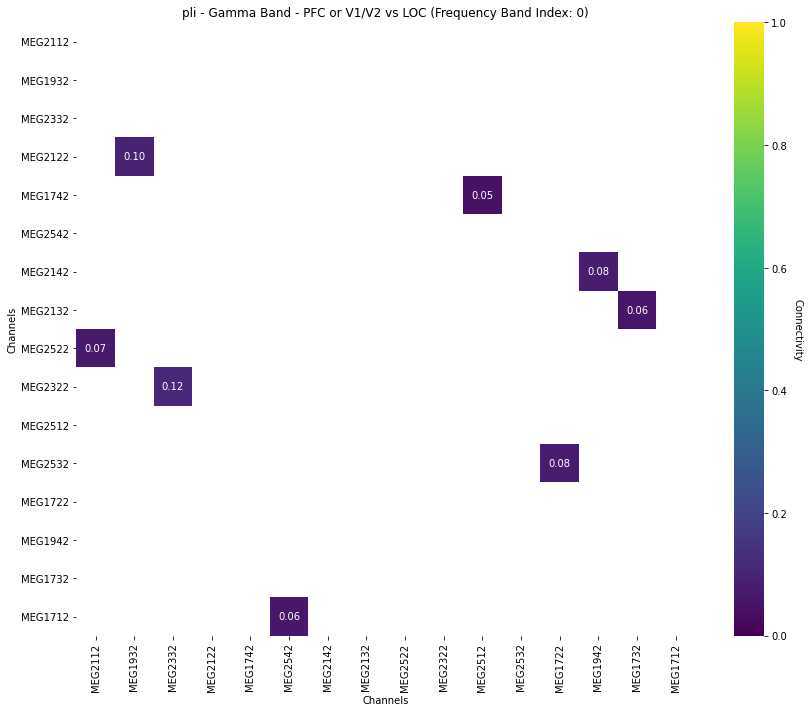

In [30]:
predict('pli', V1V2_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/pli_grad_V1V2')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


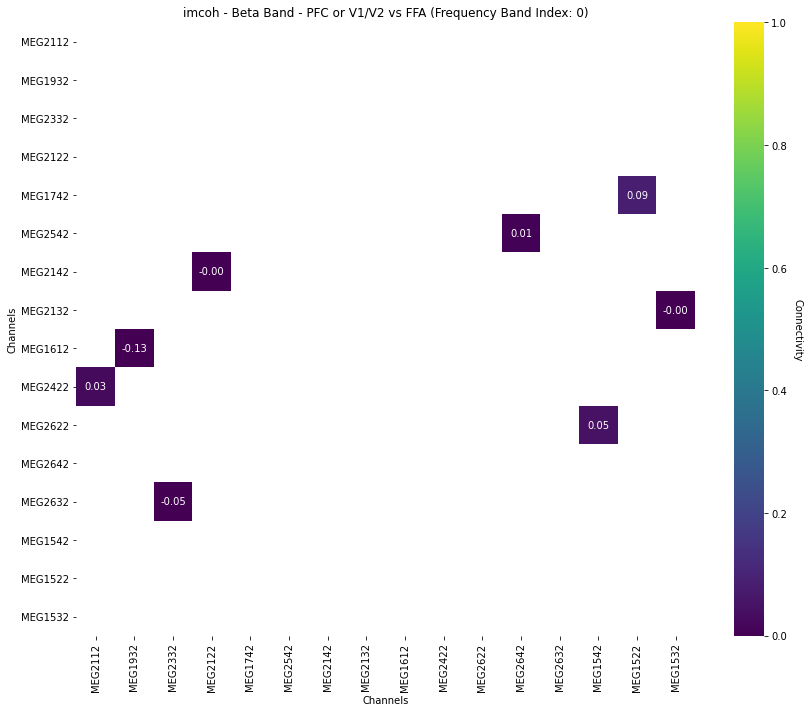

Frequency Band Index: 0
Min value: nan, Max value: nan


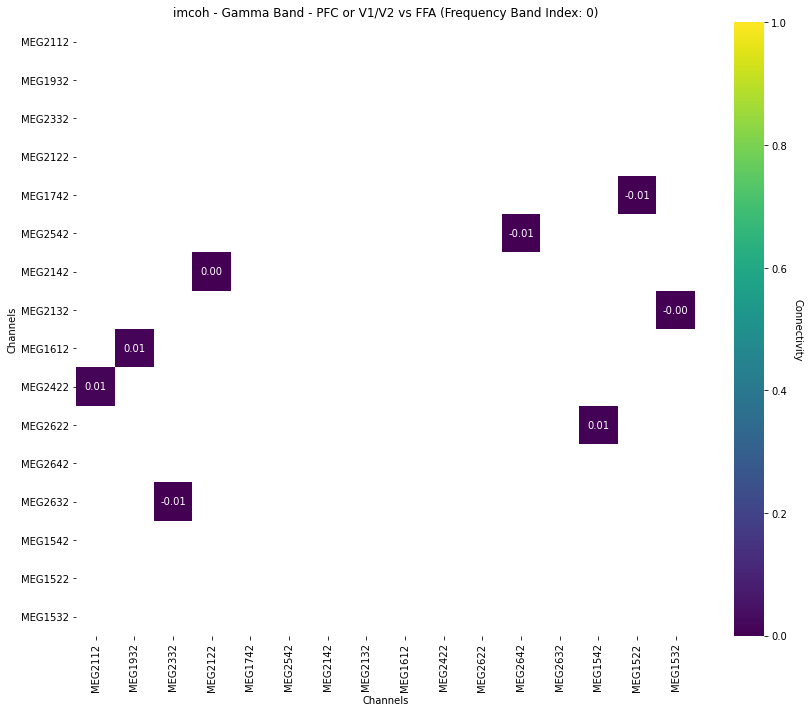

Frequency Band Index: 0
Min value: nan, Max value: nan


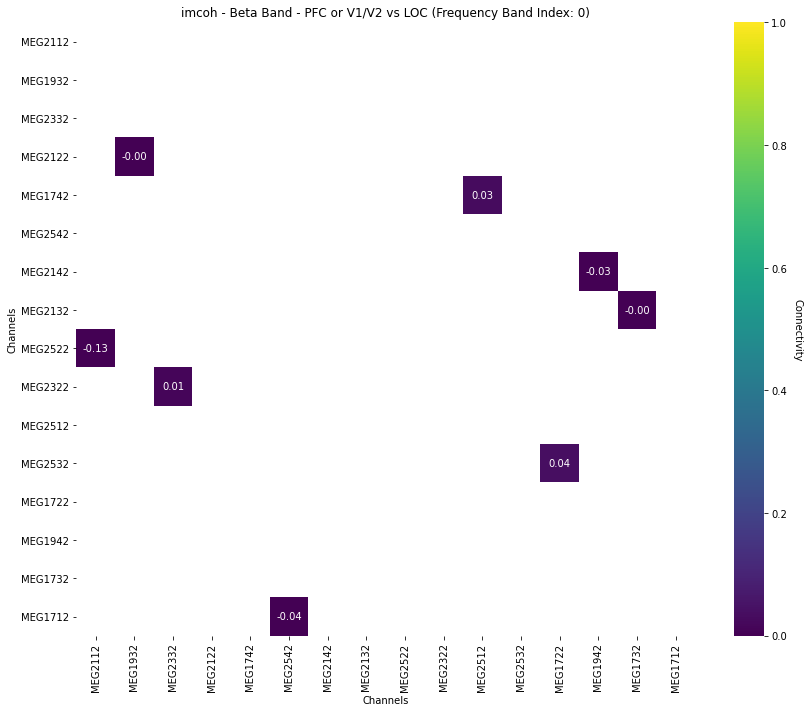

Frequency Band Index: 0
Min value: nan, Max value: nan


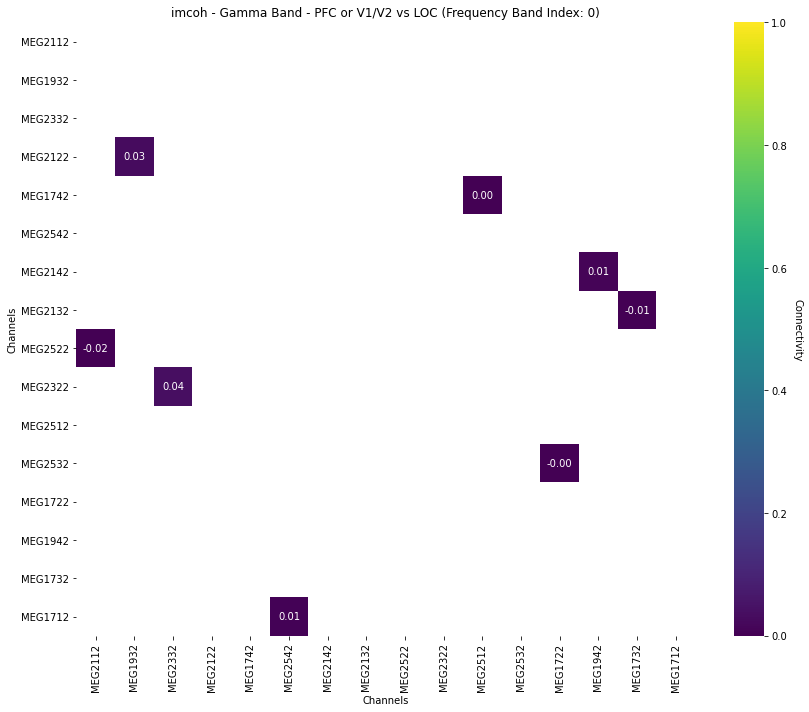

In [31]:
predict('imcoh', V1V2_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/imcoh_grad_V1V2')

In [32]:
# predict('gc', V1V2_grad_chs, FFA_grad_chs, LOC_grad_chs, 'results/gc_mag_V1V2')

### IIT predictions (magnetometers)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


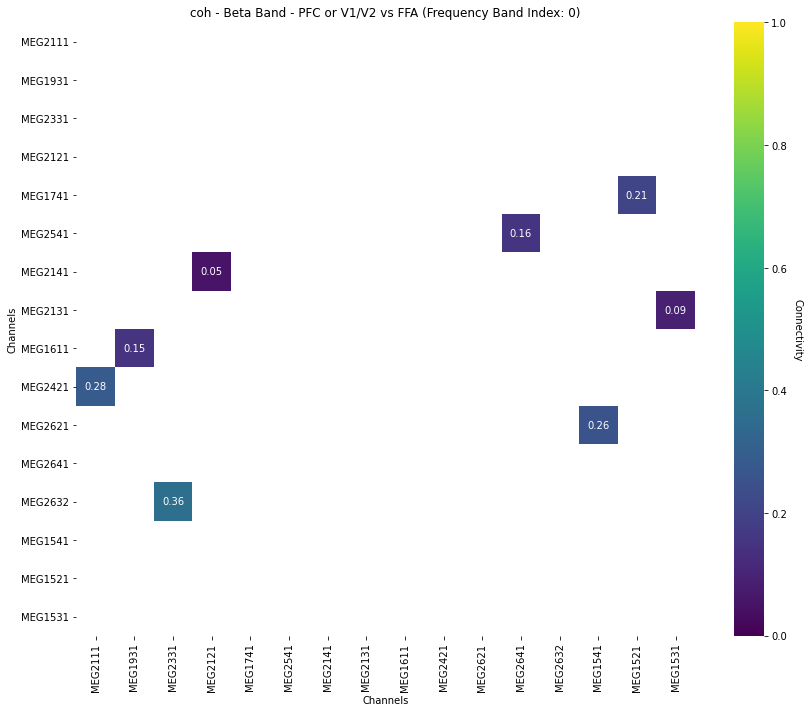

Frequency Band Index: 0
Min value: nan, Max value: nan


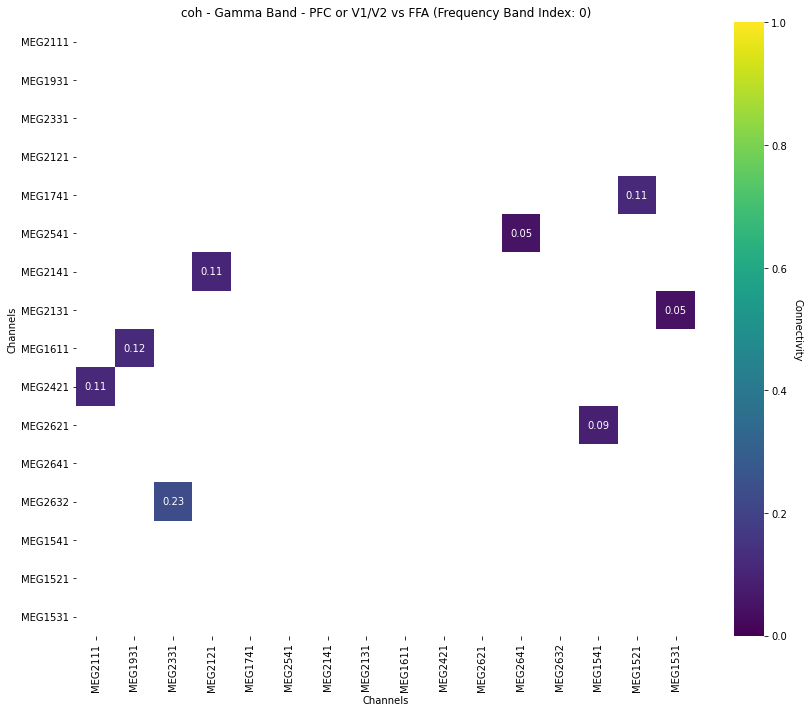

Frequency Band Index: 0
Min value: nan, Max value: nan


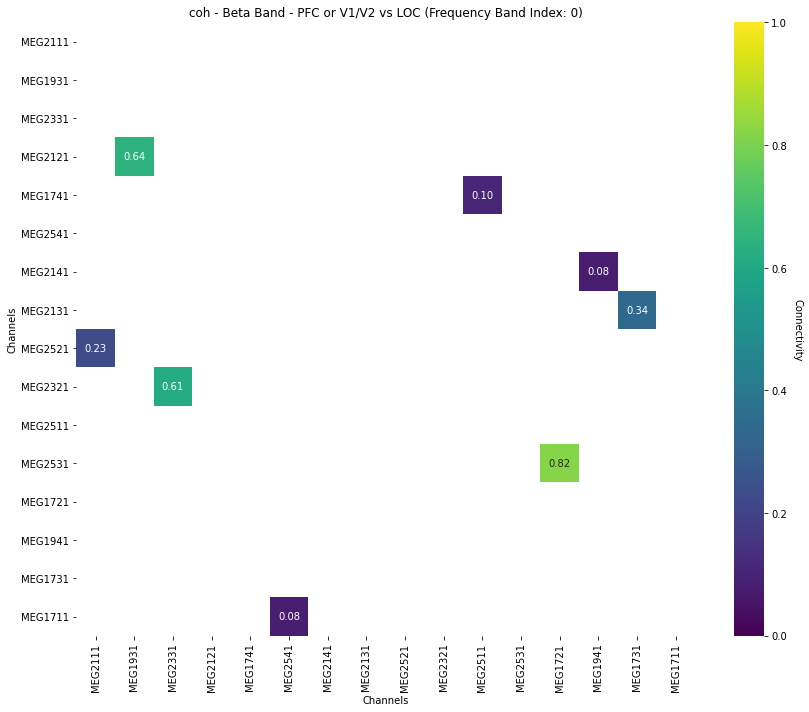

Frequency Band Index: 0
Min value: nan, Max value: nan


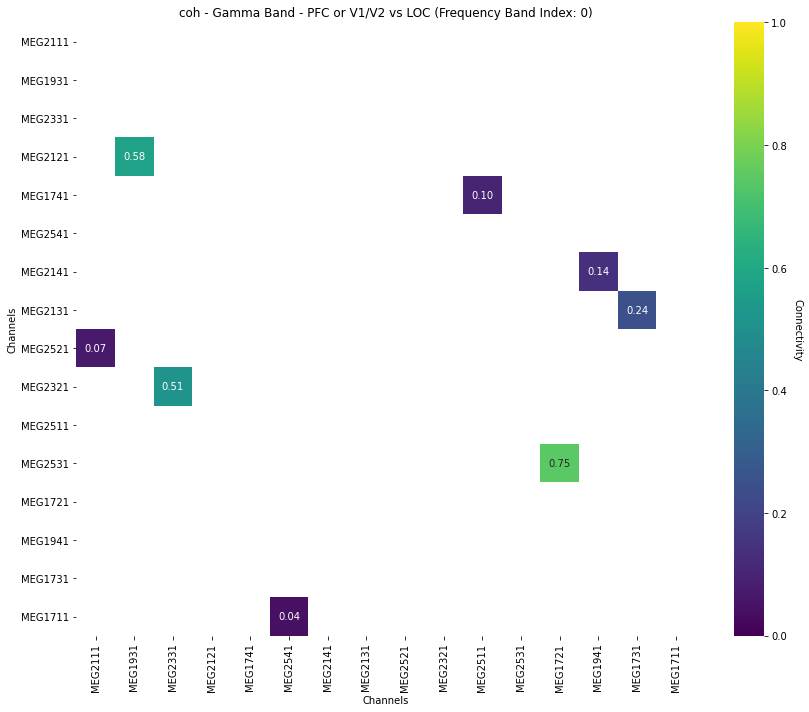

In [33]:
predict('coh', V1V2_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/coh_mag_V1V2')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


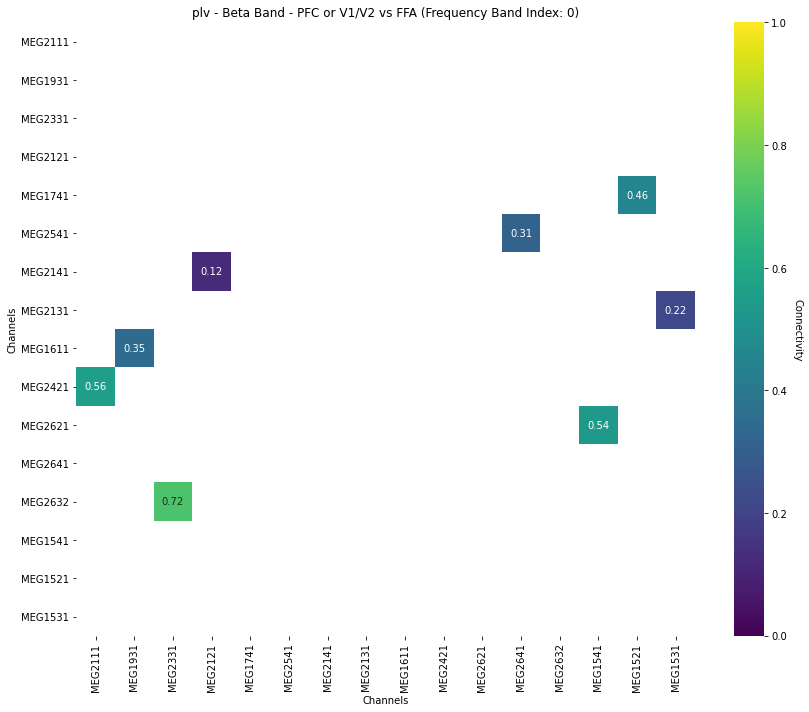

Frequency Band Index: 0
Min value: nan, Max value: nan


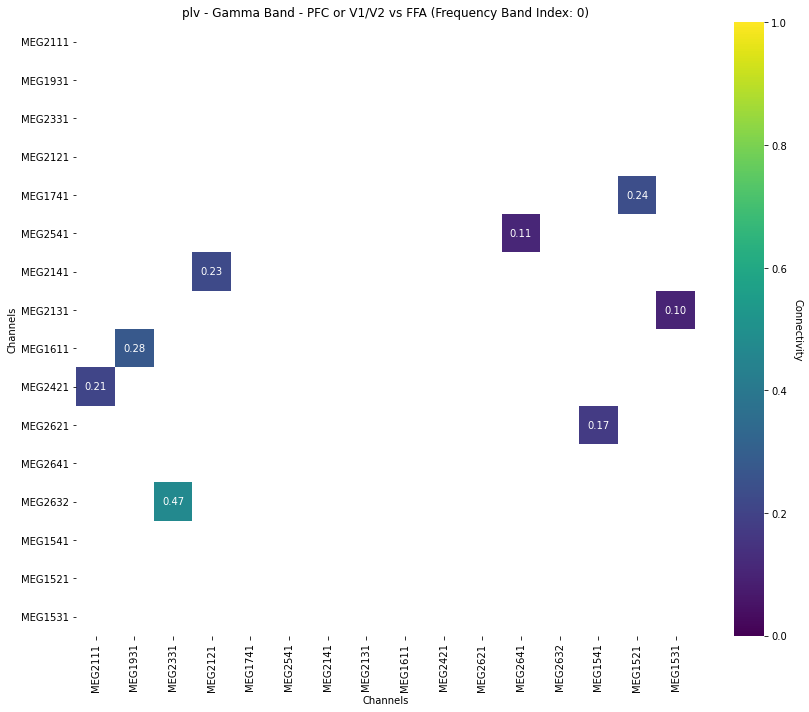

Frequency Band Index: 0
Min value: nan, Max value: nan


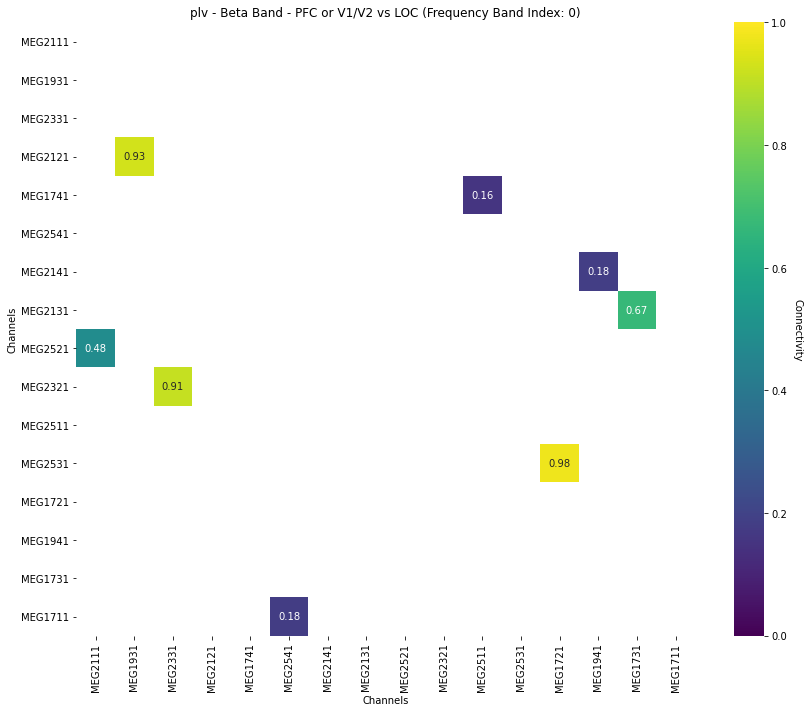

Frequency Band Index: 0
Min value: nan, Max value: nan


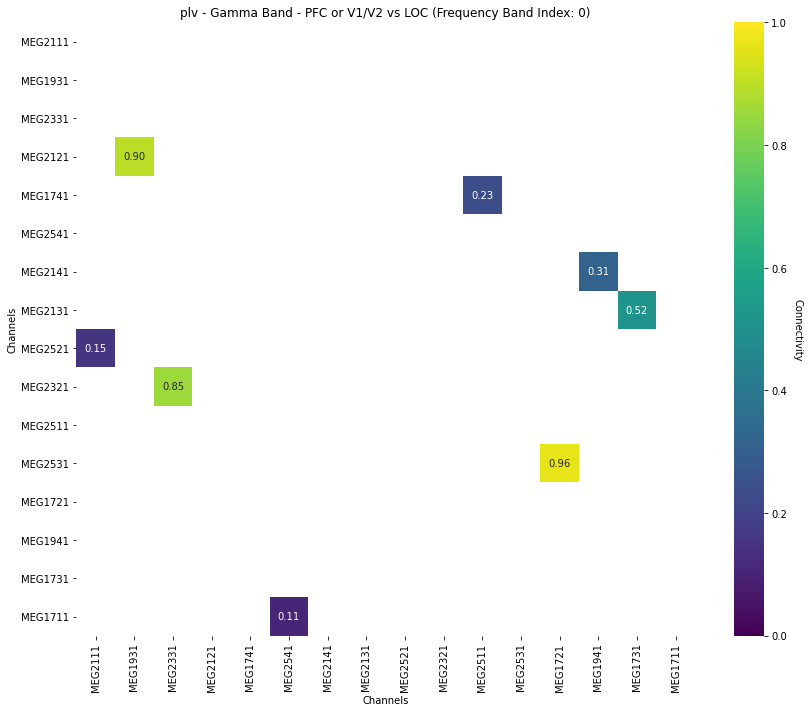

In [34]:
predict('plv', V1V2_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/plv_mag_V1V2')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


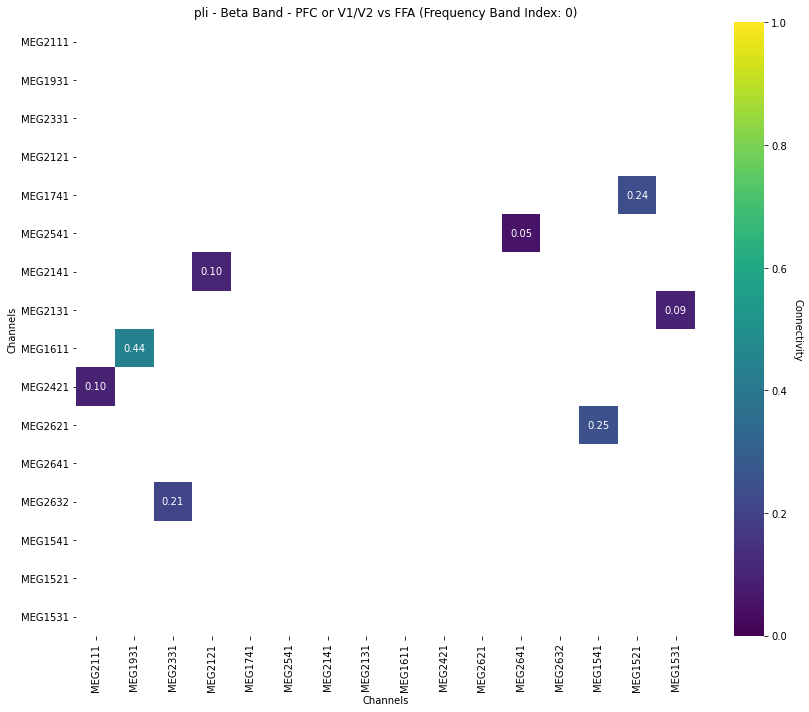

Frequency Band Index: 0
Min value: nan, Max value: nan


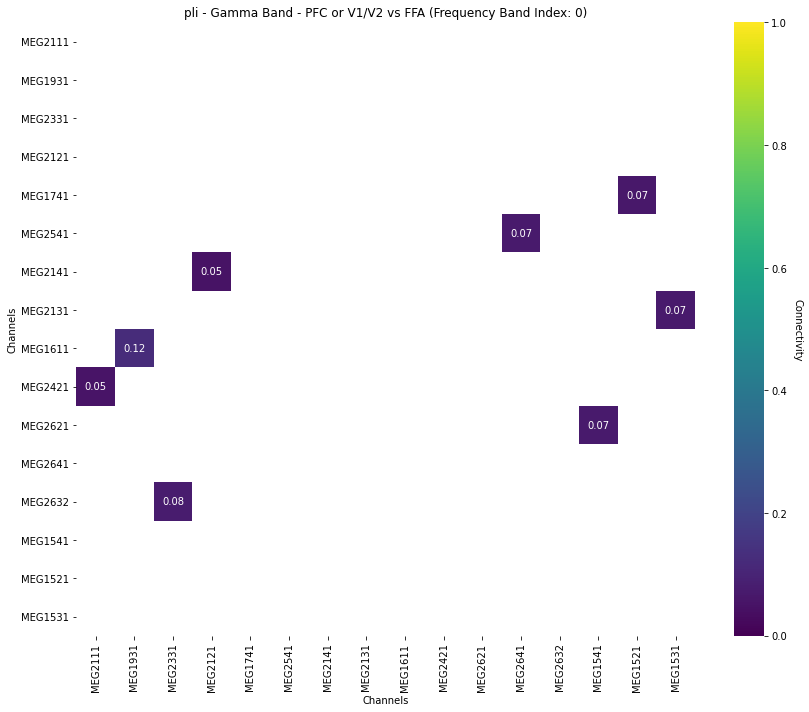

Frequency Band Index: 0
Min value: nan, Max value: nan


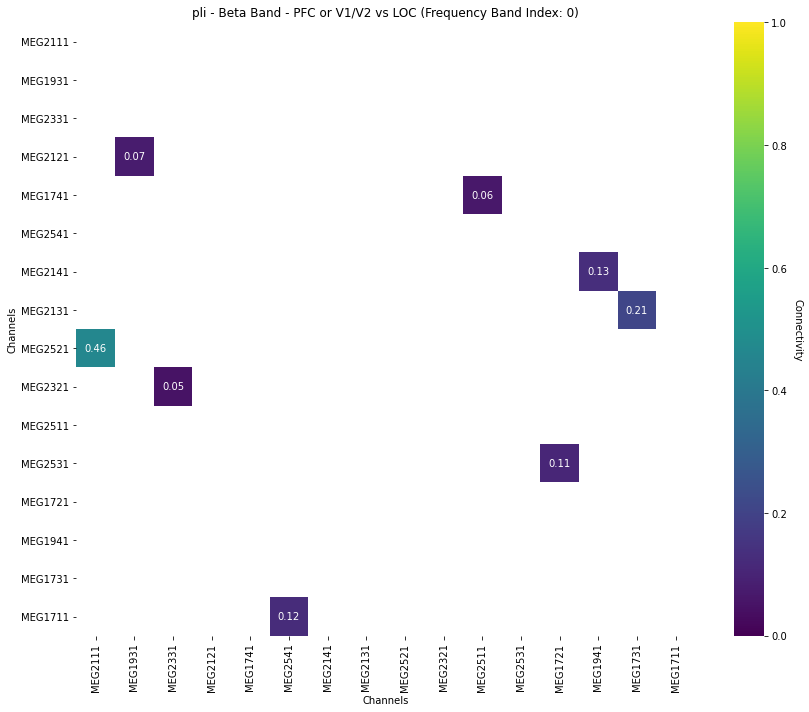

Frequency Band Index: 0
Min value: nan, Max value: nan


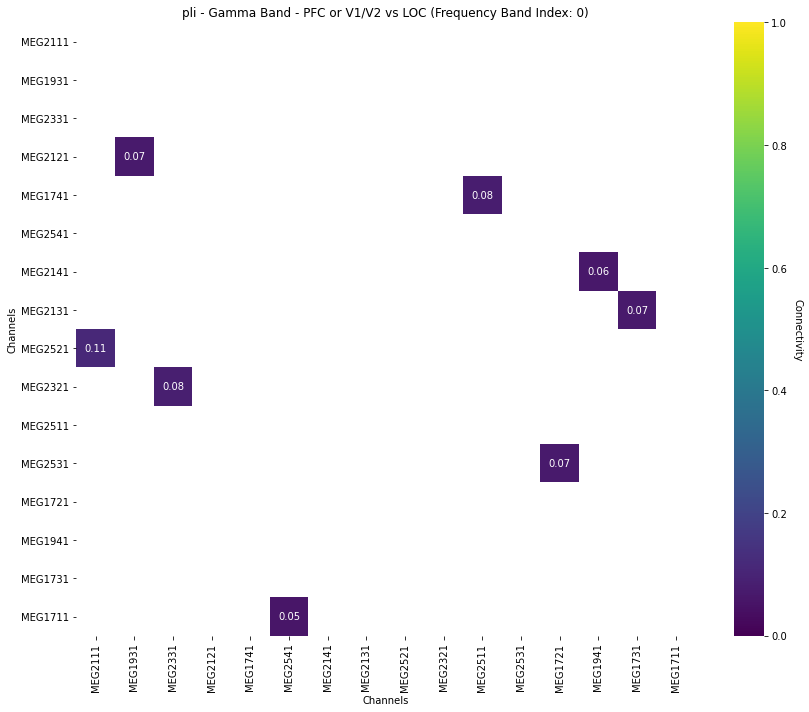

In [35]:
predict('pli', V1V2_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/pli_mag_V1V2')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:8: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_beta_picked = epochs_beta.copy().pick_channels(chs_1 + chs_2)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_718139/2831391663.py:9: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs_gamma_picked = epochs_gamma.copy().pick_channels(chs_1 + chs_2)
/tmp/ipykernel_718139/2831391663.py:15: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face02': 4
 'face03': 3
 'face04': 4
 'face05': 4
 'face06': 6
 'face07': 3
 'face08': 2
 'face09': 4
 'face10': 5
 and 50 more events ...>, so metadata was not modified.
  fc_beta = spectral_connectivity_epochs(
/tmp/ipykernel_718139/2831391663.py:26: RuntimeWarning: There were no Annotations stored in <EpochsArray |  408 events (all good), -0.25 – 1.75 s, baseline off, ~99.9 MB, data loaded,
 'face01': 3
 'face

Frequency Band Index: 0
Min value: nan, Max value: nan


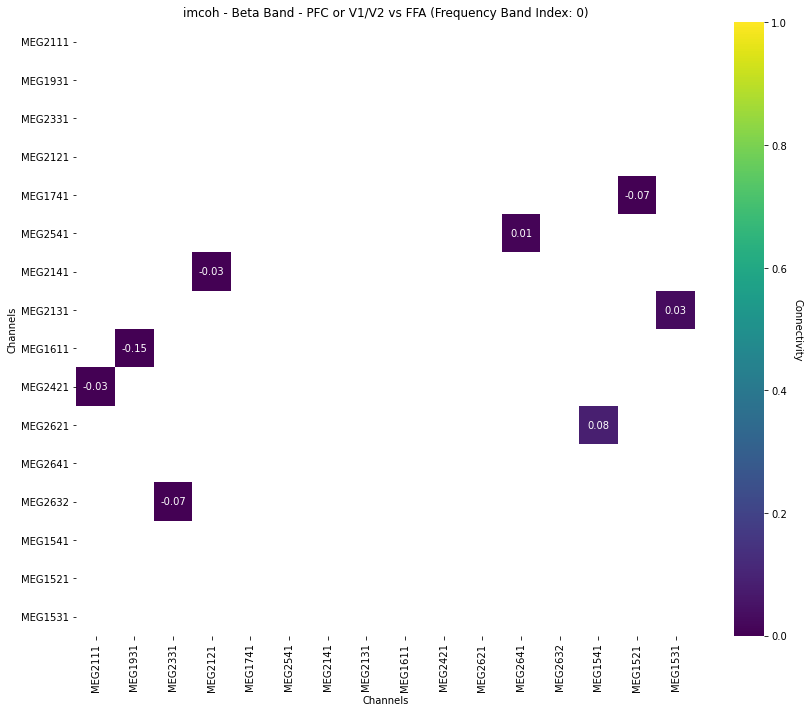

Frequency Band Index: 0
Min value: nan, Max value: nan


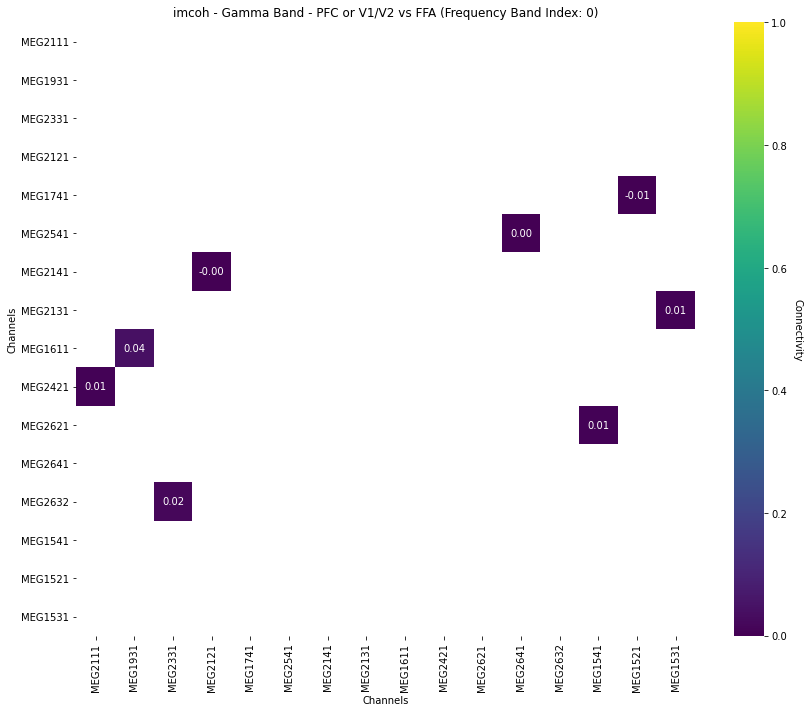

Frequency Band Index: 0
Min value: nan, Max value: nan


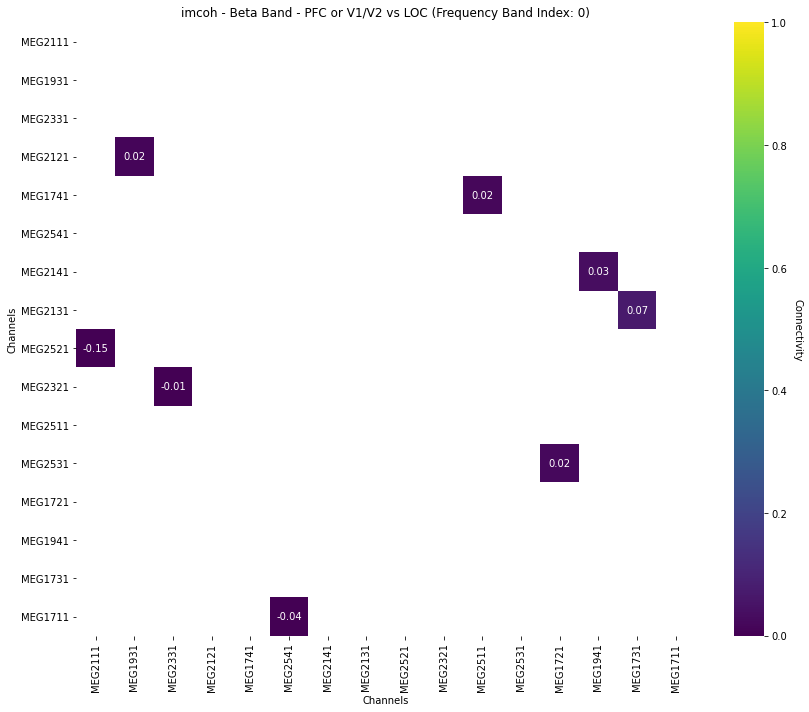

Frequency Band Index: 0
Min value: nan, Max value: nan


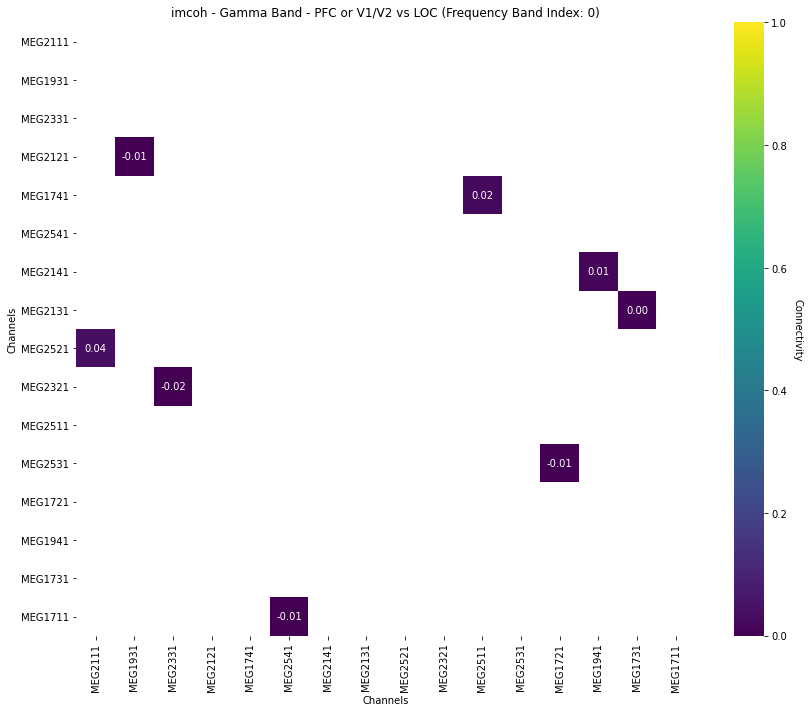

In [36]:
predict('imcoh', V1V2_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/imcoh_mag_V1V2')

In [37]:
# predict('gc', V1V2_mag_chs, FFA_mag_chs, LOC_mag_chs, 'results/gc_mag_V1V2')